In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
from scipy.interpolate import interp1d
from scipy.integrate import simps

In [13]:
main_path = "/home/alex/TP/comet_data"
path = ["thin_ring_half_10", "thick_ring_half_5"]

dx = 3900. / 36864
seeds = [7999, 574, 249]
resol = [2048, 8192, 36864]

In [14]:
def normalizing_hist(x, y):
    curr_sum = np.sum(y)
    return [x, y / curr_sum / (x[1:] - x[:-1])]

def get_data(main_path, path, seeds, resol):
    data_a = {k: {} for k in resol}
    for k0, key_curr in enumerate(list(data_a.keys())):
        for fold in path:
            fname = os.listdir(os.path.join(main_path, fold))
            try:
                fname = [k for k in fname if \
                     k.find(str(seeds[k0]))!=-1 and k.find(str(resol[k0]))!=-1][0]
                with open(os.path.join(main_path, fold, fname), "rb") as f:
                    data_a[key_curr][fold] = pkl.load(f)
            except:
                print(key_curr, fold, "err")
            #print(main_path, fold, fname)
            #with open(os.path.join(main_path, fold, fname), "rb") as f:
            #    data_a[key_curr][fold] = pkl.load(f)
    return data_a

In [15]:
data = get_data(main_path, path, seeds, resol)

36864 thick_ring_half_5 err


In [16]:
def get_pretty_data(x_all, y_all, mean_all, cir_num):
    x, y, mean_v = x_all[cir_num], y_all[cir_num], mean_all[cir_num]
    x, y = normalizing_hist(x / mean_v, y)
    #print(np.sum(y * (x[1:] - x[:-1])))
    return x, y

def get_simplified(data_a, cir_num):
    kinds_resol = list(data_a.keys())
    kinds_slices = list(data_a[kinds_resol[0]].keys())

    dist_to_graph = {k0: {k: {} for k in kinds_slices} for k0 in kinds_resol}
    for ks0 in kinds_resol:
        for ks in kinds_slices:
            try:
                for dist in list(data_a[ks0][ks]["x"].keys()):
                    #print(data_a[ks]["y"][dist])
                    #print(dist, ks0, ks, data_a[ks0][ks]["x"])
                        dist_to_graph[ks0][ks][dist] = \
                            get_pretty_data(data_a[ks0][ks]["x"][dist], \
                                            data_a[ks0][ks]["y"][dist], \
                                            data_a[ks0][ks]["numer_mean"][dist], \
                                            cir_num)
            except:
                print(ks0, ks)
    return dist_to_graph

In [26]:
def plot_circ_data(data_a, cir_num):
    simpl = get_simplified(data_a, cir_num)
    kinds_resol = list(data_a.keys())
    kinds_slices = list(data_a[kinds_resol[0]].keys())
    
    fig, ax = plt.subplots(5, 2, figsize=(20, 50))
    legends_set = {}
    for ks0 in kinds_resol:
        for ks in kinds_slices:
            #print(sorted(list(simpl[ks0][ks].keys()), key=lambda x: int(x)))
            for d0, dist in enumerate(sorted(list(simpl[ks0][ks].keys()), key=lambda x: int(x))):
                if ((ks0 == 2048 and d0 == 0) or (ks0 == 8192 and d0 == 0 and ks.find("thick")!=-1)):
                    continue
                x_curr = (simpl[ks0][ks][dist][0][1:] + \
                                simpl[ks0][ks][dist][0][:-1]) / 2
                for i in range(2):
                    ax[d0, i].set_xscale("log")
                    if (i == 1):
                        ax[d0, i].set_yscale("log")
                        ax[d0, i].scatter(x_curr, \
                            simpl[ks0][ks][dist][1], marker="x")
                        #print(simpl[ks][dist][1])
                        if (d0 == 0):
                            ax[d0, i].set_ylim(1e-9, 1e1)
                        else:
                            ax[d0, i].set_ylim(1e-9, 1e1)
                    else:
                        ax[d0, i].scatter(x_curr, \
                            simpl[ks0][ks][dist][1], marker="x")
                        #ax[d0 ,i].set_ylim(0., 360000.)
                    ax[d0, i].set_xlabel("intensity / average")
                    ax[d0, i].set_xlim(1e-3, 1e2)
                    
                if len(legends_set.get(dist, [])) == 0:
                    legends_set[dist] = []
                legends_set[dist].append(ks.split("_")[0] + " km, " + str(ks0))

    #data_numerical = np.concatenate([data_big[:200], data_sma[200:]], -1)
    ax[0, 0].plot(binedges, np.exp(data_kernel[20]), alpha=0.5)
    ax[0, 0].plot(binedges, np.exp(data_kernel[50]), alpha=0.5)
    ax[0, 0].plot(binedges, np.exp(data_kernel[100]), alpha=0.5)
    ax[0, 0].plot(binedges, np.exp(data_kernel[500]), alpha=0.5)
    ax[0, 1].plot(binedges, np.exp(data_kernel[20]), alpha=0.5)
    ax[0, 1].plot(binedges, np.exp(data_kernel[50]), alpha=0.5)
    ax[0, 1].plot(binedges, np.exp(data_kernel[100]), alpha=0.5)
    ax[0, 1].plot(binedges, np.exp(data_kernel[500]), alpha=0.5)

    legends_set[3.5] = ["kernel 20", "kernel 50", "kernel 100", "kernel 500"] + legends_set[3.5]
                
    #print(legends_set)
    for d0,dist in enumerate(sorted(list(legends_set), key=lambda x: int(x))):
        for i in range(2):
            if i == 0:
                ax[d0, i].set_title(str(dist) + " km, x: log, y: normal")
            else:
                ax[d0, i].set_title(str(dist) + " km, x: log, y: log")
            #if (d0 == 0  and i == 0):
            #    ax[0, 0].legend(legends_set[dist] + ["kernel"])                
            #else:
            ax[d0, i].legend(legends_set[dist])
            ax[d0, i].grid()
    """
    for d0,d in enumerate(list(simpl[np.max(kinds_resol)][ks].keys())):
        for i,ik in enumerate(kinds_resol):
            if (i < 2):
                ax[d0, i].legend([k.split("_")[0] for k in kinds_slices])
            else:
                ax[d0, i].legend([k.split("_")[0] for k in kinds_slices])
            ax[d0, i].set_title(str(d) + " km")
            ax[d0, i].grid()
            #if (i == 1):
            #    ax[d0, i].set_yscale("log")
    """
    plt.savefig("comparison_2048_8192.pdf")

In [27]:
plot_circ_data(data, 0)

IndexError: invalid index to scalar variable.

In [38]:
data['thin_ring_half_10'].keys()

dict_keys(['numer_mean', 'theor_mean', 'x', 'y', 'total_count'])

In [40]:
data['thick_ring_half_5'].keys()

dict_keys(['numer_mean', 'theor_mean', 'x', 'y', 'total_count'])

In [6]:
def combine(accum_x, accum_y):
    x_new, y_new = accum_x[0], accum_y[0]
    for i in range(1, len(accum_y)):
        wrong = accum_x[i] <= np.max(x_new)
        x_new = np.concatenate([x_new, accum_x[i][~wrong]], -1)
        y_new = np.concatenate([y_new, accum_y[i][~wrong]], -1)
    return x_new, y_new

In [9]:
path_kernel = "/home/alex/TP/hse_data/kernel/8192_eq"
flist = sorted(os.listdir(path_kernel), \
               key=lambda x: np.sum([float(k)*(1+1000*(1-k0)) \
                        for k0,k in enumerate(x.split("_")[:-1])]))

num_cir = 0
dists = np.unique([k.split("_")[0] for k in flist])
for dist in dists:
    flist_curr = [k for k in flist if k.find(str(dist) + "_") != -1]
    arr_list = []
    for fname in flist_curr:
        with open(os.path.join(path_kernel, fname), "rb") as f:
            arr_list.append(pkl.load(f))
    accum_x = [arr_list[num_cir][0][k] for k in range(49)]
    accum_y = [arr_list[num_cir][1][k] for k in range(49)]
    
    # then we will combine results
    x_new, y_new = combine(accum_x, accum_y)
    1/0             

FileNotFoundError: [Errno 2] No such file or directory: '/home/alex/TP/hse_data/kernel/8192_eq'

In [10]:
len(arr_list), len(arr_list[0]), \
len(arr_list[0][0]), len(arr_list[0][1]), len(arr_list[0][1][0])

NameError: name 'arr_list' is not defined

In [7]:
path_kernel = "/home/alex/TP/hse_data/kernel/hist/set_kernels"
paths_all = ["8192_1", "8192_5", "8192_20", "8192_100", "8192_500", \
             "8192_1000", "8192_2000", \
             "8192_5000", "8192_10000", "8192_20000"]
#["8192_big_h", "8192_inter_h", "8192_small_h"]

cir_num = 0
fname = os.listdir(os.path.join(path_kernel, paths_all[0]))
fname = list(sorted(fname, key=lambda x: \
                     float(x.split("_")[0])*1000 + \
                     float(x.split("_")[1])))[1]
print(fname)
data_kernel = {1: [], 5: [], 20: [], 100: [], 500: [], \
               1000: [], 2000: [],\
               5000: [], 10000: [], 20000: []}
with open(os.path.join(path_kernel, paths_all[0], fname), "rb") as f:
    data_kernel[1] = pkl.load(f)
with open(os.path.join(path_kernel, paths_all[1], fname), "rb") as f:
    data_kernel[5] = pkl.load(f)
with open(os.path.join(path_kernel, paths_all[2], fname), "rb") as f:
    data_kernel[20] = pkl.load(f)
with open(os.path.join(path_kernel, paths_all[3], fname), "rb") as f:
    data_kernel[100] = pkl.load(f)
with open(os.path.join(path_kernel, paths_all[4], fname), "rb") as f:
    data_kernel[500] = pkl.load(f)
with open(os.path.join(path_kernel, paths_all[5], fname), "rb") as f:
    data_kernel[1000] = pkl.load(f)
with open(os.path.join(path_kernel, paths_all[6], fname), "rb") as f:
    data_kernel[2000] = pkl.load(f)
with open(os.path.join(path_kernel, paths_all[7], fname), "rb") as f:
    data_kernel[5000] = pkl.load(f)
with open(os.path.join(path_kernel, paths_all[8], fname), "rb") as f:
    data_kernel[10000] = pkl.load(f)
with open(os.path.join(path_kernel, paths_all[9], fname), "rb") as f:
    data_kernel[20000] = pkl.load(f)

28.0_0_thin.pkl


/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)


(5.6953482518611845e-09, 1)

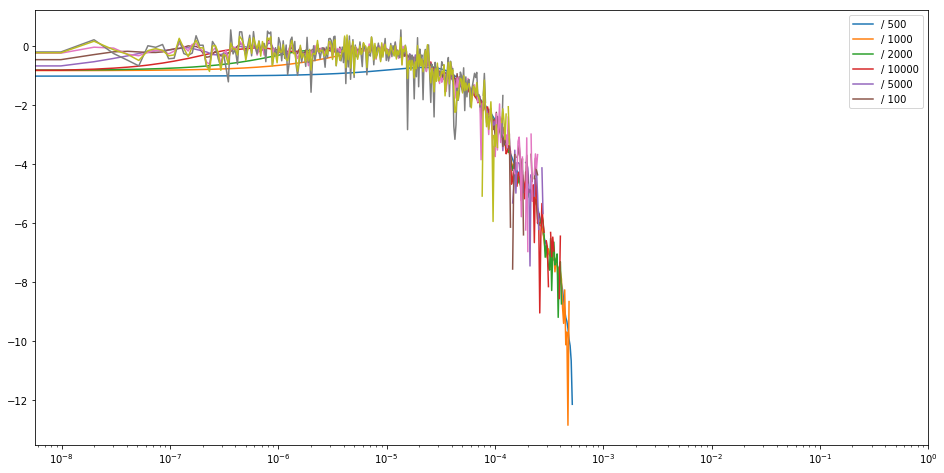

In [105]:
plt.figure(figsize=(16, 8))

plt.plot(binedges, data_kernel[1])
plt.plot(binedges, data_kernel[5])
plt.plot(binedges, data_kernel[20])
plt.plot(binedges, data_kernel[100])
plt.plot(binedges, data_kernel[500])
plt.plot(binedges, data_kernel[1000])
plt.plot(binedges, data_kernel[2000])
plt.plot(binedges, data_kernel[10000])
plt.plot(binedges, data_kernel[5000])
plt.xscale("log")
#plt.legend(["5", "10", "20", "50", "100", "500"])
plt.legend(["/ 500", "/ 1000", "/ 2000", "/ 10000", \
            "/ 5000", "/ 100"])
plt.xlim(0,1)

In [28]:
data_mlab = []
with open("/home/alex/TP/hse_data/matlab_est.txt", "r") as f:
    data_mlab = np.array([float(k.strip()) for k in f.readlines()])
data_mlab1 = []
with open("/home/alex/TP/hse_data/matlab_est1.txt", "r") as f1:
    data_mlab1 = np.array([float(k.strip()) for k in f1.readlines()])
data_mlab2 = []
with open("/home/alex/TP/hse_data/matlab_est2.txt", "r") as f2:
    data_mlab2 = np.array([float(k.strip()) for k in f2.readlines()])

In [355]:
def extract_an_vals(curr_dist, max_dist):
    path_an = "/home/alex/Downloads/refwdpdfofintensityatshorterz/"
    #path_an = "/home/abuzovkin/py_atm/scripts/an_data"
    #path_an = "/home/alex/TP/octave_an/data/old/an_data"
    curr_file = [f for f in os.listdir(path_an) if \
                 f.find(str(int(curr_dist)))!=-1][0]
    with open(os.path.join(path_an, curr_file), "r") as f:
        data = f.readlines()[1:]
    data = [[float(m) for m in s.strip().split(" ")] for s in data if len(s) > 0]

    if np.max([n[0] for n in data]) < max_dist:
        data.append([max_dist + 1, 1e-10])
    interCurve = interp1d([n[0] for n in data], [n[1] for n in data], kind="linear")
    return interCurve

def take_half(curr_dist):
    # path to analytical curves
    path_an = "/home/alex/Downloads/refwdpdfofintensityatshorterz/"
    #path_an = "/home/alex/TP/octave_an/data/old/an_data"
    curr_file = [f for f in os.listdir(path_an) if \
                 f.find(str(int(curr_dist)))!=-1][0]
    with open(os.path.join(path_an, curr_file), "r") as f:
        data = f.readlines()[1:]
    data = np.stack([np.array([float(m) for m in s.strip().split(" ")]) \
            for s in data if len(s) > 0])

    # half-width
    data = data[data[:,1] > 0.5 * data[0,1], 0][-1]
    return data

def bins_set(Iavg, numbins):
    binsize0 = Iavg * 1e-2
    lastedge = Iavg * 1e+3
    c = np.log(1 + lastedge / binsize0) / numbins
    binedges = (np.exp(c * np.arange(numbins + 1)) - 1) * binsize0
    binedges[-1] = Iavg * 1e+8
    return binedges

d_c = 28.0
half_curr = take_half(d_c) / 10. / 2.
func_inter = extract_an_vals(d_c, 3900 / 2 + 1)
Iavg = func_inter(half_curr)
print(Iavg)
binedges = bins_set(Iavg, 500)
print(binedges/Iavg)
with open("/home/alex/TP/hse_data/bins.txt", "w") as f:
    for b in binedges:
        f.write(str(b / Iavg)+"\n")

4.211296448701681e-05
[0.00000000e+00 2.32930127e-04 4.71285899e-04 7.15193695e-04
 9.64782839e-04 1.22018567e-03 1.48153759e-03 1.74897719e-03
 2.02264627e-03 2.30268992e-03 2.58925664e-03 2.88249835e-03
 3.18257055e-03 3.48963233e-03 3.80384651e-03 4.12537968e-03
 4.45440233e-03 4.79108891e-03 5.13561793e-03 5.48817207e-03
 5.84893826e-03 6.21810779e-03 6.59587638e-03 6.98244434e-03
 7.37801663e-03 7.78280299e-03 8.19701805e-03 8.62088142e-03
 9.05461785e-03 9.49845731e-03 9.95263512e-03 1.04173921e-02
 1.08929747e-02 1.13796350e-02 1.18776311e-02 1.23872271e-02
 1.29086930e-02 1.34423055e-02 1.39883474e-02 1.45471083e-02
 1.51188844e-02 1.57039789e-02 1.63027020e-02 1.69153712e-02
 1.75423113e-02 1.81838547e-02 1.88403416e-02 1.95121200e-02
 2.01995462e-02 2.09029846e-02 2.16228082e-02 2.23593987e-02
 2.31131466e-02 2.38844515e-02 2.46737225e-02 2.54813780e-02
 2.63078461e-02 2.71535653e-02 2.80189837e-02 2.89045604e-02
 2.98107648e-02 3.07380775e-02 3.16869900e-02 3.26580056e-02
 3

In [11]:
with open("/home/alex/TP/hse_data/experiment_8192_28.0_0.pkl", "rb") as f1:
    pdf, grid = pkl.load(f1)

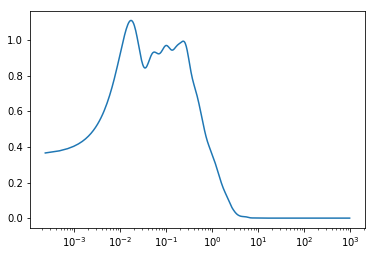

In [38]:
plt.plot(grid, data_mlab1[:-1])
plt.xscale("log")

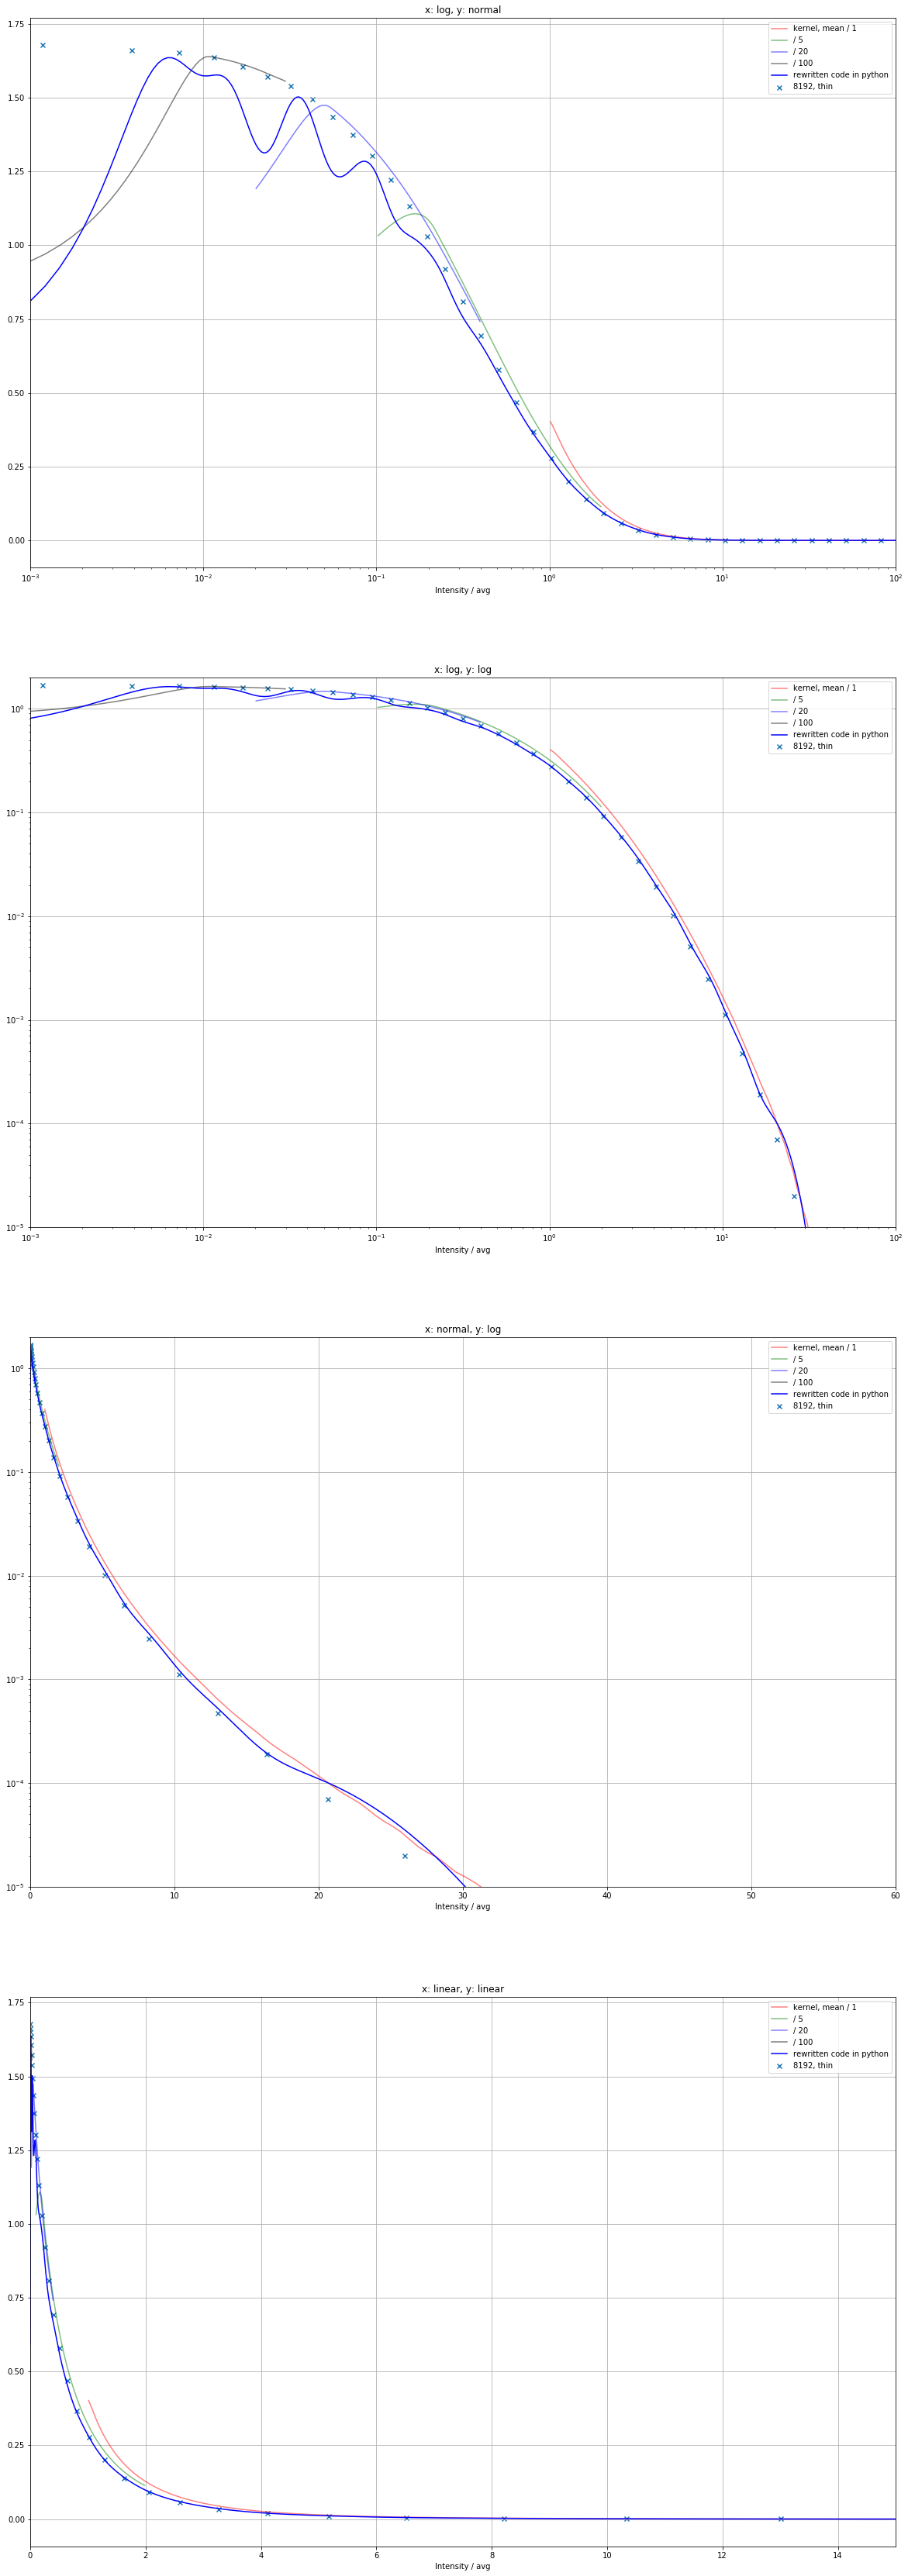

In [15]:
####################################################### custom painting
sbplts = [411, 412, 413, 414]
def plot_circ_data(data_a, cir_num):
    simpl = get_simplified(data_a, cir_num)
    kinds_resol = list(data_a.keys())
    kinds_slices = list(data_a[kinds_resol[0]].keys())

    dist_c = 28.0
    dist_str = ["28", "0"]

    if dist_c == 3.5:
        set_leg = ["kernel, mean / 1", "/ 5", "/ 20 ", "/ 100", \
               "MATLAB1 function", "MATLAB2", "MATLAB3", "rewritten code in python 1", "2",\
               "8192, thin"]
    else:
        set_leg = ["kernel, mean / 1", "/ 5", "/ 20 ", "/ 100", \
               "rewritten code in python",\
               "8192, thin"]
        
    plt.figure(figsize=(20, 60))
    for s0,sbpl in enumerate(sbplts):
        plt.subplot(sbplts[s0])
        if s0 == 0:
            plt.xscale("log")
            plt.title("x: log, y: normal")
        elif s0 == 1:
            plt.xscale("log")
            plt.yscale("log")
            plt.title("x: log, y: log")
        elif s0 == 2:
            plt.yscale("log")
            plt.title("x: normal, y: log")
        else:
            plt.title("x: normal, y: normal")
        """
        plt.plot([binedges[binedges / Iavg>=2.] / Iavg][:][0], \
                 [np.exp(data_kernel[1])[binedges / Iavg>=2.]][:][0], alpha=0.5, c="r")
        plt.plot([binedges[(binedges / Iavg>=0.4) & (binedges / Iavg<2.)] / Iavg][:][0], \
                 [np.exp(data_kernel[5])[(binedges / Iavg>=0.4) & (binedges / Iavg<2.)]][:][0], alpha=0.5, c="g")
        plt.plot([binedges[(binedges / Iavg>=0.03) & (binedges / Iavg<0.4)] / Iavg][:][0], \
                 [np.exp(data_kernel[20])[(binedges / Iavg>=0.03) & (binedges / Iavg<0.4)]][:][0], alpha=0.5, c="b")
        plt.plot([binedges[binedges / Iavg<0.03] / Iavg][:][0], \
                 [np.exp(data_kernel[100])[binedges / Iavg<0.03]][:][0], alpha=0.5, c="k")
        """
        plt.plot([binedges[binedges / Iavg>=1.] / Iavg][:][0], \
                 [np.exp(data_kernel[1])[binedges / Iavg>=1.]][:][0], alpha=0.5, c="r")
        plt.plot([binedges[(binedges / Iavg>=0.1) & (binedges / Iavg<2.)] / Iavg][:][0], \
                 [np.exp(data_kernel[5])[(binedges / Iavg>=0.1) & (binedges / Iavg<2.)]][:][0], alpha=0.5, c="g")
        plt.plot([binedges[(binedges / Iavg>=0.02) & (binedges / Iavg<0.4)] / Iavg][:][0], \
                 [np.exp(data_kernel[20])[(binedges / Iavg>=0.02) & (binedges / Iavg<0.4)]][:][0], alpha=0.5, c="b")
        plt.plot([binedges[binedges / Iavg<0.03] / Iavg][:][0], \
                 [np.exp(data_kernel[100])[binedges / Iavg<0.03]][:][0], alpha=0.5, c="k")

        #plt.plot(binedges / Iavg, np.exp(data_kernel[500]), alpha=0.5)
        #plt.plot(binedges / Iavg, np.exp(data_kernel[1000]), alpha=0.5)
        #plt.plot(binedges / Iavg, np.exp(data_kernel[2000]), alpha=0.5)
        #plt.plot(binedges[binedges<5] / Iavg, np.exp(data_kernel[5000][binedges<5]), alpha=0.5)
        #plt.plot(binedges[binedges<1e-1] / Iavg, np.exp(data_kernel[10000][binedges<1e-1]), alpha=0.5)
        #plt.plot(binedges[binedges<3e-2] / Iavg, np.exp(data_kernel[20000][binedges<3e-2]), alpha=0.5)
        x_curr = (simpl[8192]['thin_ring_half_10'][dist_c][0][1:] + \
                        simpl[8192]['thin_ring_half_10'][dist_c][0][:-1]) / 2
        plt.scatter(x_curr, simpl[8192]["thin_ring_half_10"][dist_c][1], marker="x")

        #plt.plot(binedges[:-1] / Iavg, data_mlab, c="m")
        #plt.plot(binedges[:-1] / Iavg, data_mlab1, c="m", marker="x")
        #plt.plot(binedges[:-1] / Iavg, data_mlab2, c="m", marker="o")
        
        plt.plot(binedges[:-2] / Iavg, pdf, c="b")
        #plt.plot(binedges[:-1] / Iavg, pdf, c="b", marker=".")# / simps(pdf, binedges[:-1] / Iavg))
        
        plt.legend(set_leg)
        plt.xlabel("Intensity / avg")
        if dist_c == 28.0 and s0 == 2:
            plt.xlim(1e-3, 60)
        elif dist_c == 3.5 and s0 == 2:
            plt.xlim(1e-3, 15)
        else:
            plt.xlim(1e-3, 100)
        
        if (s0 == 1 or s0 == 2):
            plt.ylim(1e-5, 2.)

        plt.grid()
    """
    plt.subplot(412)
    plt.xscale("log")
    plt.yscale("log")
    plt.plot(binedges / Iavg, np.exp(data_kernel[5]), alpha=0.5)
    plt.plot(binedges / Iavg, np.exp(data_kernel[10]), alpha=0.5)
    plt.plot(binedges / Iavg, np.exp(data_kernel[20]), alpha=0.5)
    if dist_c==3.5:
        plt.plot(binedges[binedges<5] / Iavg, np.exp(data_kernel[5000][binedges<5]), alpha=0.5)
        plt.plot(binedges[binedges<1e-1] / Iavg, np.exp(data_kernel[10000][binedges<1e-1]), alpha=0.5)
        plt.plot(binedges[binedges<3e-2] / Iavg, np.exp(data_kernel[100][binedges<3e-2]), alpha=0.5)
        x_curr = (simpl[8192]['thin_ring_half_10'][dist_c][0][1:] + \
                        simpl[8192]['thin_ring_half_10'][dist_c][0][:-1]) / 2
        plt.scatter(x_curr, simpl[8192]["thin_ring_half_10"][dist_c][1], marker="x")
    else:
        plt.plot(binedges / Iavg, np.exp(data_kernel[5000]), alpha=0.5)
        plt.plot(binedges / Iavg, np.exp(data_kernel[10000]), alpha=0.5)
        plt.plot(binedges / Iavg, np.exp(data_kernel[100]), alpha=0.5)
        x_curr = (simpl[8192]['thin_ring_half_10'][dist_c][0][1:] + \
                        simpl[8192]['thin_ring_half_10'][dist_c][0][:-1]) / 2
        plt.scatter(x_curr, simpl[8192]["thin_ring_half_10"][dist_c][1], marker="x")
    plt.legend(set_leg)
    plt.xlim(1e-3, 300)
    plt.grid()
    plt.xlabel("Intensity / avg")
    plt.title("x: log, y: log")
    
    plt.subplot(413)
    plt.yscale("log")
    plt.plot(binedges / Iavg, np.exp(data_kernel[5]), alpha=0.5)
    plt.plot(binedges / Iavg, np.exp(data_kernel[10]), alpha=0.5)
    plt.plot(binedges / Iavg, np.exp(data_kernel[20]), alpha=0.5)
    if dist_c==3.5:
        plt.plot(binedges[binedges<5] / Iavg, np.exp(data_kernel[5000][binedges<5]), alpha=0.5)
        plt.plot(binedges[binedges<1e-1] / Iavg, np.exp(data_kernel[10000][binedges<1e-1]), alpha=0.5)
        plt.plot(binedges[binedges<3e-2] / Iavg, np.exp(data_kernel[100][binedges<3e-2]), alpha=0.5)
        x_curr = (simpl[8192]['thin_ring_half_10'][dist_c][0][1:] + \
                        simpl[8192]['thin_ring_half_10'][dist_c][0][:-1]) / 2
        plt.scatter(x_curr, simpl[8192]["thin_ring_half_10"][dist_c][1], marker="x")
    else:
        plt.plot(binedges / Iavg, np.exp(data_kernel[5000]), alpha=0.5)
        plt.plot(binedges / Iavg, np.exp(data_kernel[10000]), alpha=0.5)
        plt.plot(binedges / Iavg, np.exp(data_kernel[100]), alpha=0.5)
        x_curr = (simpl[8192]['thin_ring_half_10'][dist_c][0][1:] + \
                        simpl[8192]['thin_ring_half_10'][dist_c][0][:-1]) / 2
        plt.scatter(x_curr, simpl[8192]["thin_ring_half_10"][dist_c][1], marker="x")
    plt.grid()
    plt.title("x: linear, y: log")
    plt.xlim(0, 15)
    plt.xlabel("Intensity / avg")

    plt.subplot(414)
    plt.plot(binedges / Iavg, np.exp(data_kernel[5]), alpha=0.5)
    plt.plot(binedges / Iavg, np.exp(data_kernel[10]), alpha=0.5)
    plt.plot(binedges / Iavg, np.exp(data_kernel[20]), alpha=0.5)
    if dist_c==3.5:
        plt.plot(binedges[binedges<5] / Iavg, np.exp(data_kernel[5000][binedges<5]), alpha=0.5)
        plt.plot(binedges[binedges<1e-1] / Iavg, np.exp(data_kernel[10000][binedges<1e-1]), alpha=0.5)
        plt.plot(binedges[binedges<3e-2] / Iavg, np.exp(data_kernel[100][binedges<3e-2]), alpha=0.5)
        x_curr = (simpl[8192]['thin_ring_half_10'][dist_c][0][1:] + \
                        simpl[8192]['thin_ring_half_10'][dist_c][0][:-1]) / 2
        plt.scatter(x_curr, simpl[8192]["thin_ring_half_10"][dist_c][1], marker="x")
    else:
        plt.plot(binedges / Iavg, np.exp(data_kernel[5000]), alpha=0.5)
        plt.plot(binedges / Iavg, np.exp(data_kernel[10000]), alpha=0.5)
        plt.plot(binedges / Iavg, np.exp(data_kernel[100]), alpha=0.5)
        x_curr = (simpl[8192]['thin_ring_half_10'][dist_c][0][1:] + \
                        simpl[8192]['thin_ring_half_10'][dist_c][0][:-1]) / 2
        plt.scatter(x_curr, simpl[8192]["thin_ring_half_10"][dist_c][1], marker="x")
    """
    plt.legend(set_leg)
    #plt.grid()
    plt.xlim(0, 15)
    plt.xlabel("Intensity / avg")
    plt.title("x: linear, y: linear")
    #plt.title("y: log")
    plt.savefig("kernel_"+dist_str[0]+"p"+dist_str[1]+"km.pdf")
    plt.show()

plot_circ_data(data, 0)

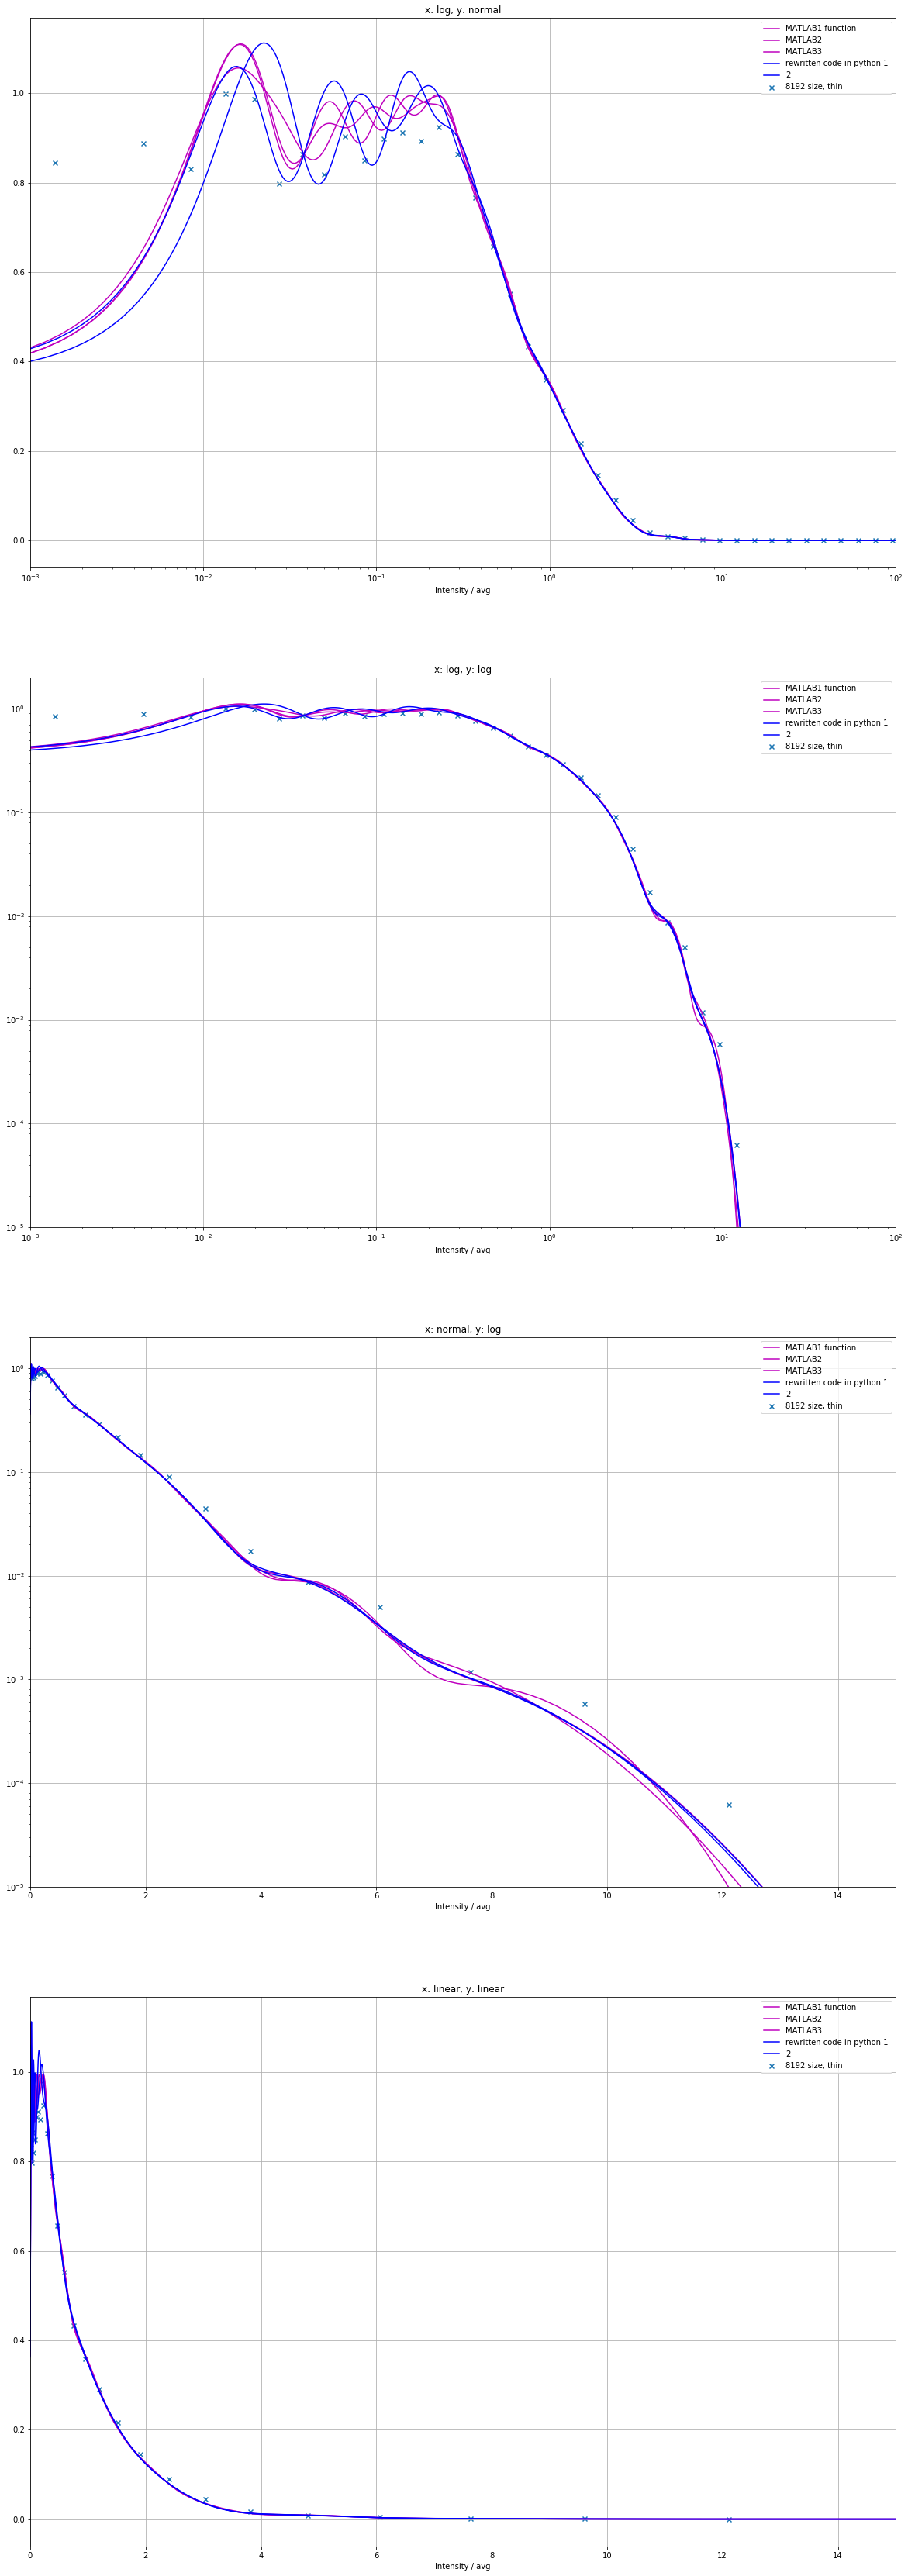

In [27]:
####################################################### custom painting
sbplts = [411, 412, 413, 414]
def plot_circ_data(data_a, cir_num):
    simpl = get_simplified(data_a, cir_num)
    kinds_resol = list(data_a.keys())
    kinds_slices = list(data_a[kinds_resol[0]].keys())

    dist_c = 3.5
    dist_str = ["3", "5"]

    if dist_c == 3.5:
        set_leg = ["MATLAB1 function", "MATLAB2", "MATLAB3", "rewritten code in python 1", "2", \
                  "8192 size, thin"]
    else:
        set_leg = ["kernel, mean / 1", "/ 5", "/ 20 ", "/ 100", \
               "rewritten code in python",\
               "8192, thin"]
        
    plt.figure(figsize=(20, 60))
    for s0,sbpl in enumerate(sbplts):
        plt.subplot(sbplts[s0])
        if s0 == 0:
            plt.xscale("log")
            plt.title("x: log, y: normal")
        elif s0 == 1:
            plt.xscale("log")
            plt.yscale("log")
            plt.title("x: log, y: log")
        elif s0 == 2:
            plt.yscale("log")
            plt.title("x: normal, y: log")
        else:
            plt.title("x: normal, y: normal")
        plt.plot(binedges[:-1] / Iavg, data_mlab, c="m")
        plt.plot(binedges[:-1] / Iavg, data_mlab1, c="m")#, marker="x")
        plt.plot(binedges[:-1] / Iavg, data_mlab2, c="m")#, marker="o")
        
        plt.plot(binedges[:-1] / Iavg, pdf2, c="b")
        plt.plot(binedges[:-1] / Iavg, pdf, c="b")#, marker=".")# / simps(pdf, binedges[:-1] / Iavg))
        
        x_curr = (simpl[8192]['thin_ring_half_10'][dist_c][0][1:] + \
                        simpl[8192]['thin_ring_half_10'][dist_c][0][:-1]) / 2
        plt.scatter(x_curr, simpl[8192]["thin_ring_half_10"][dist_c][1], marker="x")

        
        plt.legend(set_leg)
        plt.xlabel("Intensity / avg")
        if dist_c == 28.0 and s0 == 2:
            plt.xlim(1e-3, 60)
        elif dist_c == 3.5 and s0 == 2:
            plt.xlim(1e-3, 15)
        else:
            plt.xlim(1e-3, 100)
        
        if (s0 == 1 or s0 == 2):
            plt.ylim(1e-5, 2.)

        plt.grid()
    """
    plt.subplot(412)
    plt.xscale("log")
    plt.yscale("log")
    plt.plot(binedges / Iavg, np.exp(data_kernel[5]), alpha=0.5)
    plt.plot(binedges / Iavg, np.exp(data_kernel[10]), alpha=0.5)
    plt.plot(binedges / Iavg, np.exp(data_kernel[20]), alpha=0.5)
    if dist_c==3.5:
        plt.plot(binedges[binedges<5] / Iavg, np.exp(data_kernel[5000][binedges<5]), alpha=0.5)
        plt.plot(binedges[binedges<1e-1] / Iavg, np.exp(data_kernel[10000][binedges<1e-1]), alpha=0.5)
        plt.plot(binedges[binedges<3e-2] / Iavg, np.exp(data_kernel[100][binedges<3e-2]), alpha=0.5)
        x_curr = (simpl[8192]['thin_ring_half_10'][dist_c][0][1:] + \
                        simpl[8192]['thin_ring_half_10'][dist_c][0][:-1]) / 2
        plt.scatter(x_curr, simpl[8192]["thin_ring_half_10"][dist_c][1], marker="x")
    else:
        plt.plot(binedges / Iavg, np.exp(data_kernel[5000]), alpha=0.5)
        plt.plot(binedges / Iavg, np.exp(data_kernel[10000]), alpha=0.5)
        plt.plot(binedges / Iavg, np.exp(data_kernel[100]), alpha=0.5)
        x_curr = (simpl[8192]['thin_ring_half_10'][dist_c][0][1:] + \
                        simpl[8192]['thin_ring_half_10'][dist_c][0][:-1]) / 2
        plt.scatter(x_curr, simpl[8192]["thin_ring_half_10"][dist_c][1], marker="x")
    plt.legend(set_leg)
    plt.xlim(1e-3, 300)
    plt.grid()
    plt.xlabel("Intensity / avg")
    plt.title("x: log, y: log")
    
    plt.subplot(413)
    plt.yscale("log")
    plt.plot(binedges / Iavg, np.exp(data_kernel[5]), alpha=0.5)
    plt.plot(binedges / Iavg, np.exp(data_kernel[10]), alpha=0.5)
    plt.plot(binedges / Iavg, np.exp(data_kernel[20]), alpha=0.5)
    if dist_c==3.5:
        plt.plot(binedges[binedges<5] / Iavg, np.exp(data_kernel[5000][binedges<5]), alpha=0.5)
        plt.plot(binedges[binedges<1e-1] / Iavg, np.exp(data_kernel[10000][binedges<1e-1]), alpha=0.5)
        plt.plot(binedges[binedges<3e-2] / Iavg, np.exp(data_kernel[100][binedges<3e-2]), alpha=0.5)
        x_curr = (simpl[8192]['thin_ring_half_10'][dist_c][0][1:] + \
                        simpl[8192]['thin_ring_half_10'][dist_c][0][:-1]) / 2
        plt.scatter(x_curr, simpl[8192]["thin_ring_half_10"][dist_c][1], marker="x")
    else:
        plt.plot(binedges / Iavg, np.exp(data_kernel[5000]), alpha=0.5)
        plt.plot(binedges / Iavg, np.exp(data_kernel[10000]), alpha=0.5)
        plt.plot(binedges / Iavg, np.exp(data_kernel[100]), alpha=0.5)
        x_curr = (simpl[8192]['thin_ring_half_10'][dist_c][0][1:] + \
                        simpl[8192]['thin_ring_half_10'][dist_c][0][:-1]) / 2
        plt.scatter(x_curr, simpl[8192]["thin_ring_half_10"][dist_c][1], marker="x")
    plt.grid()
    plt.title("x: linear, y: log")
    plt.xlim(0, 15)
    plt.xlabel("Intensity / avg")

    plt.subplot(414)
    plt.plot(binedges / Iavg, np.exp(data_kernel[5]), alpha=0.5)
    plt.plot(binedges / Iavg, np.exp(data_kernel[10]), alpha=0.5)
    plt.plot(binedges / Iavg, np.exp(data_kernel[20]), alpha=0.5)
    if dist_c==3.5:
        plt.plot(binedges[binedges<5] / Iavg, np.exp(data_kernel[5000][binedges<5]), alpha=0.5)
        plt.plot(binedges[binedges<1e-1] / Iavg, np.exp(data_kernel[10000][binedges<1e-1]), alpha=0.5)
        plt.plot(binedges[binedges<3e-2] / Iavg, np.exp(data_kernel[100][binedges<3e-2]), alpha=0.5)
        x_curr = (simpl[8192]['thin_ring_half_10'][dist_c][0][1:] + \
                        simpl[8192]['thin_ring_half_10'][dist_c][0][:-1]) / 2
        plt.scatter(x_curr, simpl[8192]["thin_ring_half_10"][dist_c][1], marker="x")
    else:
        plt.plot(binedges / Iavg, np.exp(data_kernel[5000]), alpha=0.5)
        plt.plot(binedges / Iavg, np.exp(data_kernel[10000]), alpha=0.5)
        plt.plot(binedges / Iavg, np.exp(data_kernel[100]), alpha=0.5)
        x_curr = (simpl[8192]['thin_ring_half_10'][dist_c][0][1:] + \
                        simpl[8192]['thin_ring_half_10'][dist_c][0][:-1]) / 2
        plt.scatter(x_curr, simpl[8192]["thin_ring_half_10"][dist_c][1], marker="x")
    """
    plt.legend(set_leg)
    #plt.grid()
    plt.xlim(0, 15)
    plt.xlabel("Intensity / avg")
    plt.title("x: linear, y: linear")
    #plt.title("y: log")
    plt.savefig("kernel_"+dist_str[0]+"p_"+dist_str[1]+"km.pdf")
    plt.show()

plot_circ_data(data, 0)

In [37]:
dist_c = 28
simpl = get_simplified(data, 0)

x_curr = (simpl[8192]['thin_ring_half_10'][dist_c][0][1:] + \
                simpl[8192]['thin_ring_half_10'][dist_c][0][:-1]) / 2
y_curr = simpl[8192]["thin_ring_half_10"][dist_c][1]
with open("/home/alex/TP/hse_data/x_cu.csv", "w") as f:
    for k0,k in enumerate(x_curr[:-1]):
        f.write(str(k)+", "+str(y_curr[k0])+"\n")

with open("/home/alex/TP/hse_data/y_curr.txt", "w") as f:
    for k in y_curr[:-1]:
        f.write(str(k)+"\n")

In [38]:
x_curr[:-1], y_curr[:-1]

(array([1.38899345e-03, 4.52662641e-03, 8.47667307e-03, 1.34494882e-02,
        1.97098927e-02, 2.75912767e-02, 3.75133532e-02, 5.00045100e-02,
        6.57299479e-02, 8.55271052e-02, 1.10450255e-01, 1.41826647e-01,
        1.81327192e-01, 2.31055443e-01, 2.93659614e-01, 3.72473611e-01,
        4.71694575e-01, 5.96606393e-01, 7.53861086e-01, 9.51833054e-01,
        1.20106505e+00, 1.51482960e+00, 1.90983584e+00, 2.40711934e+00,
        3.03316230e+00, 3.82130385e+00, 4.81351548e+00, 6.06263615e+00,
        7.63518623e+00, 9.61490987e+00, 1.21072348e+01, 1.52448866e+01,
        1.91949569e+01, 2.41678019e+01, 3.04282440e+01, 3.83096752e+01,
        4.82318113e+01, 6.07230431e+01, 7.64485753e+01, 9.62458513e+01,
        1.21169150e+02, 1.52545731e+02, 1.92046513e+02, 2.41775062e+02,
        3.04379609e+02, 3.83194079e+02, 4.82415638e+02, 6.07328205e+02,
        7.64583842e+02]),
 array([8.44452931e-01, 8.87787360e-01, 8.30562323e-01, 9.98944387e-01,
        9.86300123e-01, 7.97190543e-01

##### data[8192].keys()

In [13]:
with open("/home/alex/TP/hse_data/kernel/experiment_8192_28.0_0.pkl", \
          "rb") as f:
    data_e = pkl.load(f)

In [15]:
y_, x_, _, _, _, _, _ = data_e

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


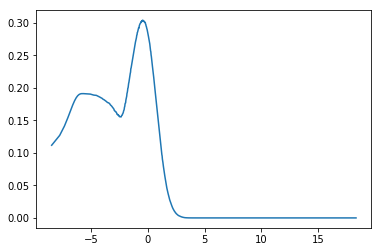

In [16]:
plt.plot(np.log(x_), y_ / simps(y_, x_))

In [18]:
d_here = np.load("/home/alex/TP/hse_data/data_3.5_0.npy") / Iavg
#np.random.shuffle(d_here)
#d_here = d_here[:1000000]

In [34]:
d_here.shape
with open("/home/alex/TP/hse_data/data_3.5_0.txt", "w") as f:
    for el in d_here:
        f.write(str(el)+"\n")

In [19]:
Iavg

array(0.01641668)

In [20]:
from akde import *

In [21]:
pdf2, grid = akde1d(np.reshape(d_here, [len(d_here), 1]).astype(np.float64), \
             binedges[:-1] / Iavg)

10.131538879806527
219.24997159278948
0 inf 0.0017703294263168366
6.203174302530926
54.18699352534742
1 1.026086964185899 0.0028209945792945887
6.5967352155405745
214.01439881603343
2 0.15183248260778157 0.001784649517854609
6.66170782914803
302.5682922360462
3 0.030220738893169608 0.0015901062044356652
6.832198121292418
391.42977236955335
4 0.02460338640294369 0.0014593159136009493
7.2274394245041265
506.201020353614
5 0.022421913699922733 0.001339449254160962
7.626763321772924
659.0410778065075
6 0.019816790118166696 0.0012266757368933005
8.014540744145066
855.4210149941465
7 0.016568984607466905 0.0011245375585491376
8.374698129286193
1093.5391521685162
8 0.013101831746820298 0.0010361496657549465
8.696180991345592
1363.0908248614644
9 0.009932476025928266 0.0009627769229005994
8.976146588887245
1650.256675493871
10 0.007388637714775967 0.0009033376346582512
9.21825573856451
1944.2585298652828
11 0.005521875852895733 0.0008552949986693241
9.428654993709557
2239.2603251614673
12 0.00

<Figure size 1008x1008 with 0 Axes>

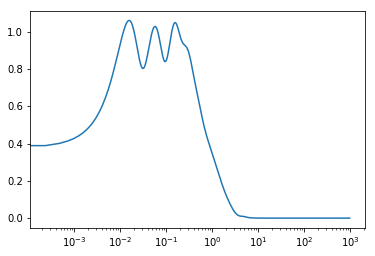

In [22]:
plt.plot(grid, pdf2)
plt.xscale('log')

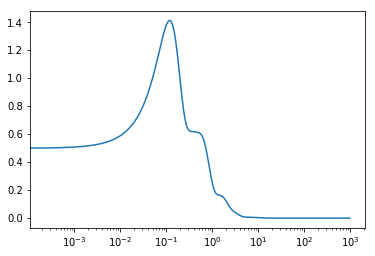

In [11]:
plt.plot(grid, pdf)
plt.xscale('log')

In [14]:
sampl = np.concatenate([np.random.normal(1., 0.1, size=(500,)), \
                        np.random.normal(-2., 0.1, size=(500,)), \
                        np.random.normal(0., 0.1, size=(500,)), \
                       np.random.normal(5., 0.1, size=(5000,))], -1)
np.random.shuffle(sampl)

In [40]:
pdf, grid = akde1d(np.reshape(d_here, [len(d_here), 1]).astype(np.float64), \
             binedges[:-1] / Iavg)

10.005368806472099
386.4306714104431
0 inf 0.0014655818353799396
6.69198451185875
39.80452480538326
1 1.0601848220675048 0.0031264857647648396
6.843328526593581
173.71864108776967
2 0.17712518086594228 0.0019131622181813798
6.6621671637446305
300.27890125012266
3 0.051698731380272596 0.0015941370816389146
7.023384725752848
426.94088624610515
4 0.030461833433277317 0.0014176793748911071
7.475741316388726
582.030724905113
5 0.024761124848935397 0.0012785526981552407
7.890049959181369
777.2939372305768
6 0.019957025685553423 0.0011610177071685523
8.255414038889276
1007.0393730451644
7 0.01488091470996303 0.001065005342902905
8.569392189877487
1257.4031286266834
8 0.010634399479716332 0.0009890291486140458
8.836970196286185
1515.13186077956
9 0.007746029006210815 0.0009294309418522127
9.065855676548454
1773.4298423804091
10 0.00594155950837935 0.0008819201513110877
9.262545527812751
2030.2234202344318
11 0.0047205423265471004 0.0008430486922188443
9.431168853984792
2283.4692924935507
12 0.

<Figure size 1008x1008 with 0 Axes>

In [19]:
with open("/home/alex/TP/hse_data/data.txt", "w") as f:
    for s in sampl:
        f.write(str(s) + "\n")

with open("/home/alex/TP/hse_data/bins1.txt", "w") as f:
    for s in np.arange(-3, 5.5, 0.01):
        f.write(str(s) + "\n")

In [15]:
pdf, grid = akde1d(np.reshape(sampl, [len(sampl), 1]).astype(np.float64), \
             np.arange(-3, 5.5, 0.01).reshape(-1,1))

5.346202479150993
23.000810266696227
0 inf 0.007784418835904624
3.5339976675807447
5.553758357942355
1 2.266112849298079 0.012501004554312219
10.394127939363697
1751.2518018894227
2 0.7272902796808115 0.0018366414227146389
10.043679595994815
1270.1396233552505
3 0.14432612378136536 0.0020442001626230066
11.330180986615456
4940.32798950575
4 0.05927336404379167 0.0012998362538378914
11.320691862222436
4921.424124419281
5 0.010062491525587372 0.001301498410572695
11.350158580567907
5049.402531752581
6 0.0004037675203473292 0.0012904085804338345
11.35010712379076
5049.1461143558345
7 4.338210047007254e-05 0.0012904304242334508
11.350450027157503
5051.005360716778
8 6.199282321036948e-06 0.001290272071434361


<Figure size 1008x1008 with 0 Axes>

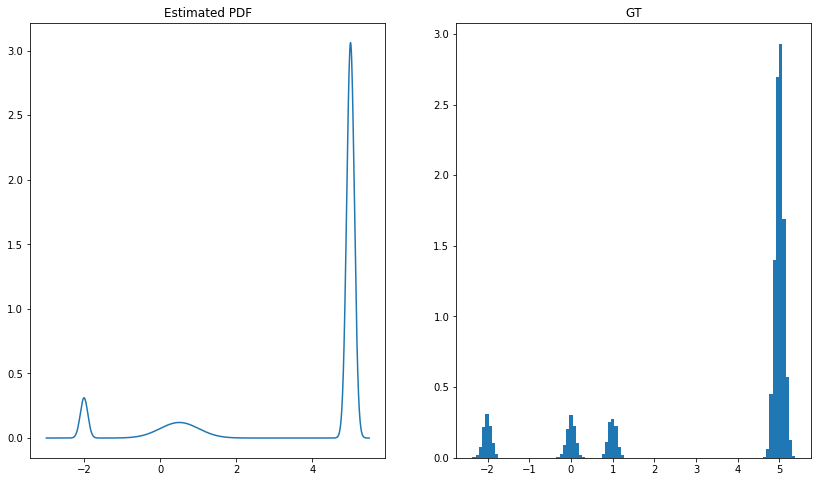

In [16]:
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.plot(grid, pdf)
plt.title("Estimated PDF")
plt.subplot(122)
plt.title("GT")
plt.hist(sampl, bins=100, density=True)
plt.show()

In [91]:
with open("/home/alex/TP/hse_data/experiment_8192_28.0_0.pkl", "rb") as f:
    d0 = pkl.load(f)
with open("/home/alex/TP/hse_data/experiment_8192_28.0_1_0.pkl", "rb") as f1:
    d1 = pkl.load(f1)
with open("/home/alex/TP/hse_data/experim_0/experiment_8192_28.0_0.pkl", "rb") as f2:
    d2 = pkl.load(f2)
with open("/home/alex/TP/hse_data/experiment_8192_28.0_2_0.pkl", "rb") as f2:
    d3 = pkl.load(f2)
with open("/home/alex/TP/hse_data/experiment_8192_28.0_3_0.pkl", "rb") as f2:
    d4 = pkl.load(f2)
with open("/home/alex/TP/hse_data/experiment_8192_28.0_4_0.pkl", "rb") as f2:
    d5 = pkl.load(f2)
with open("/home/alex/TP/hse_data/experiment_8192_28.0_5_0.pkl", "rb") as f2:
    d6 = pkl.load(f2)
with open("/home/alex/TP/hse_data/experiment_8192_28.0_6_0.pkl", "rb") as f2:
    d7 = pkl.load(f2)
with open("/home/alex/TP/hse_data/experiment_8192_28.0_log_0.pkl", "rb") as f2:
    dlog = pkl.load(f2)
with open("/home/alex/TP/hse_data/experiment_8192_28.0_log1_0.pkl", "rb") as f2:
    dlog1 = pkl.load(f2)
with open("/home/alex/TP/hse_data/experiment_8192_28.0_log2_0.pkl", "rb") as f2:
    dlog2 = pkl.load(f2)

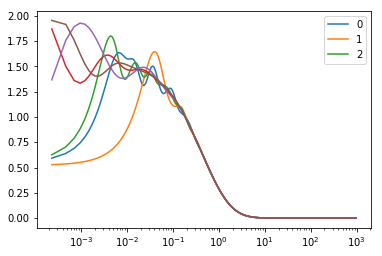

In [92]:
plt.plot(d0[1], d0[0])
plt.plot(d1[1], d1[0])
plt.plot(d7[1], d7[0])
plt.plot(np.exp(dlog[1]), np.exp(-dlog[1].ravel())*dlog[0])
plt.plot(np.exp(dlog1[1]), np.exp(-dlog1[1].ravel())*dlog1[0])
plt.plot(np.exp(dlog2[1]), np.exp(-dlog2[1].ravel())*dlog2[0])
#dlog[0] / np.abs(simps(dlog[0].ravel(), np.exp(dlog[1].ravel()))))

plt.xscale("log")
plt.legend(["0", "1", "2"])

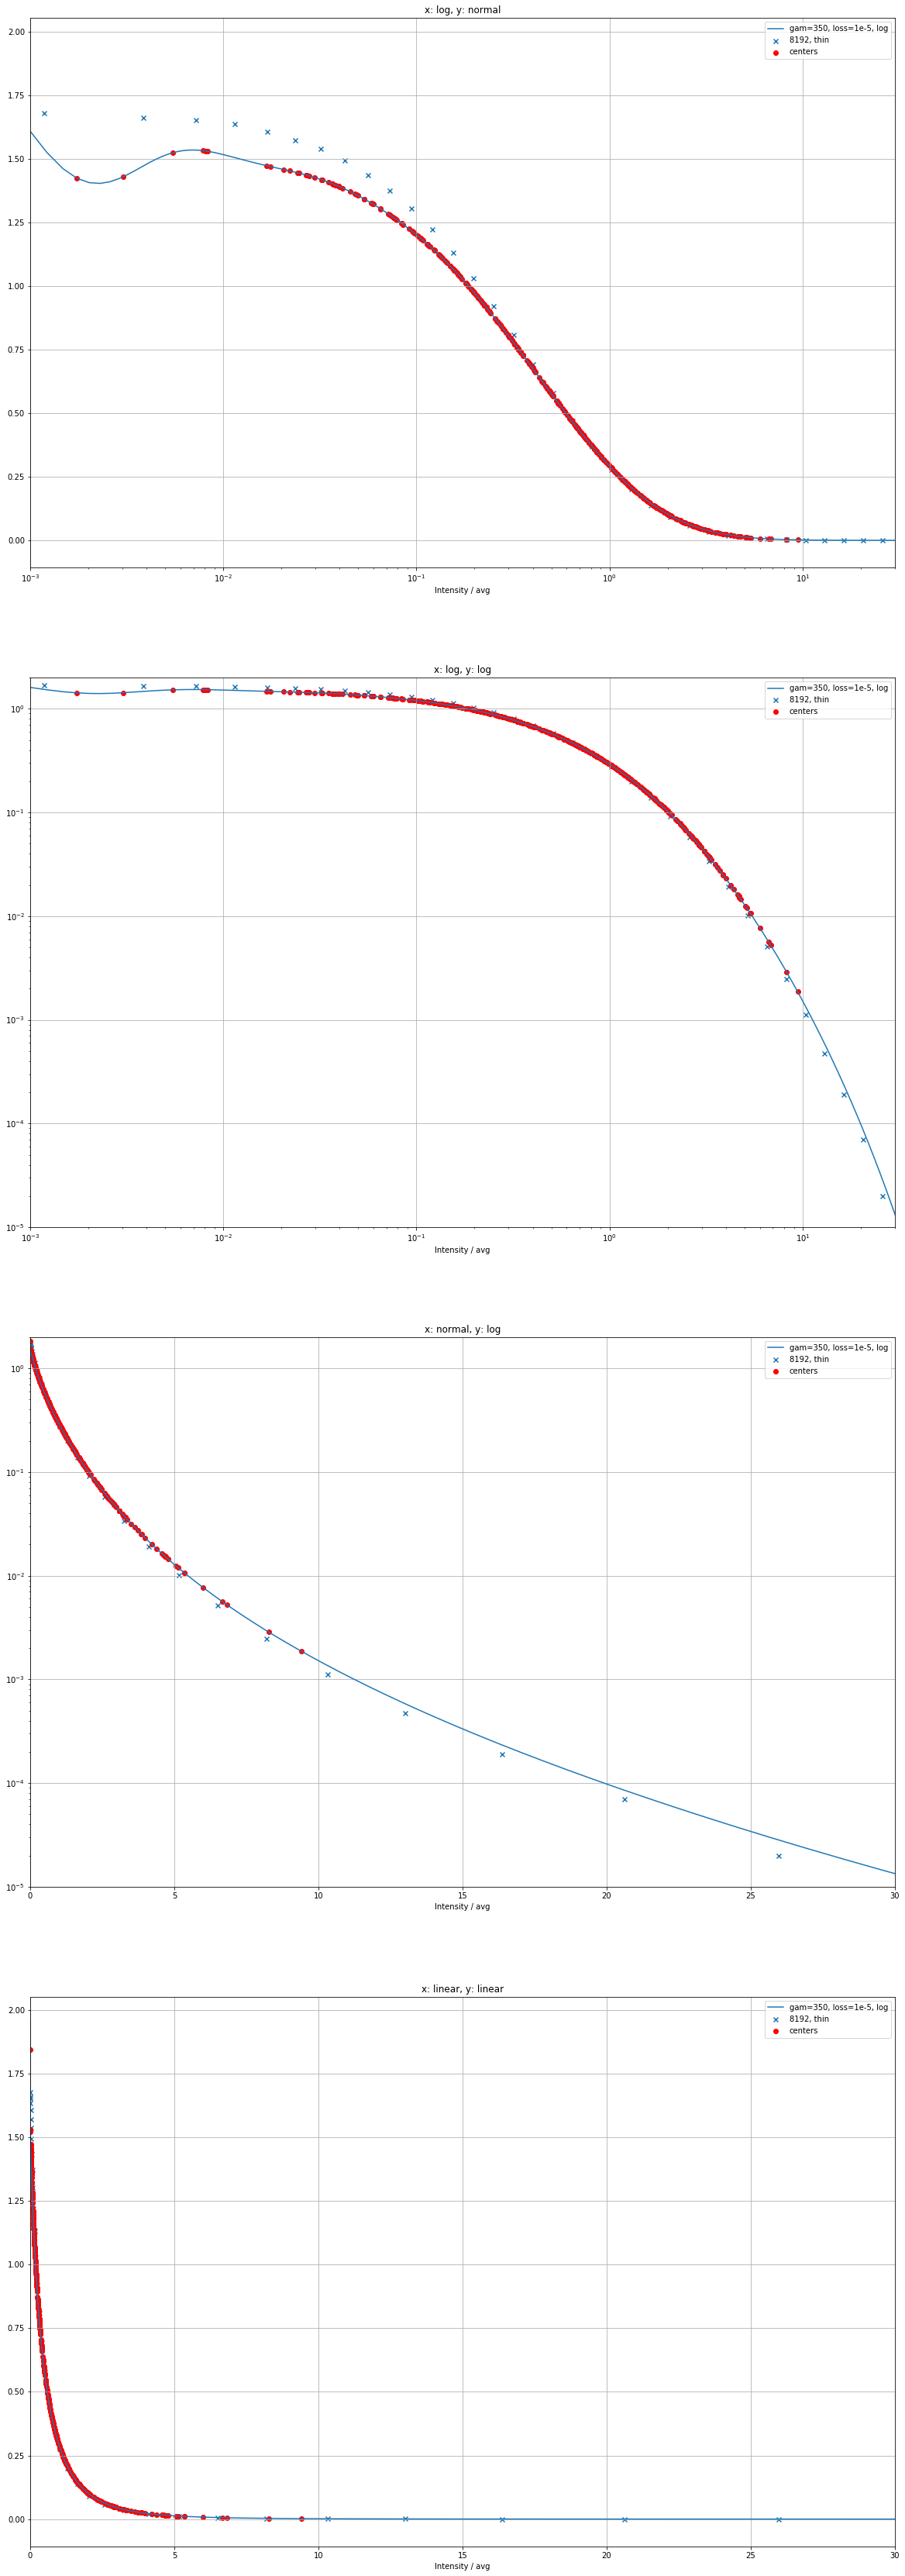

In [175]:
####################################################### custom painting
sbplts = [411, 412, 413, 414]
def plot_circ_data(data_a, cir_num):
    simpl = get_simplified(data_a, cir_num)
    kinds_resol = list(data_a.keys())
    kinds_slices = list(data_a[kinds_resol[0]].keys())

    dist_c = 28.0
    dist_str = ["28", "0"]

    if dist_c == 3.5:
        set_leg = ["MATLAB1 function", "MATLAB2", "MATLAB3", "rewritten code in python 1", "2", \
                  "8192 size, thin"]
    else:
        #set_leg = ["py1, gam=350, loss=1e-4", """2, gam=100, loss=2e-3",""" \
        #           "3, gam=7, loss=2e-3", "4, gam=130, loss=1e-4", "gam=190", "gam=220", "gam=440",\
        #        "gam=440, loss=3e-5","8192, thin"]
        #set_leg = ["gam=7, loss=2e-3", "gam=220, loss=1e-4", "gam=440, loss=3e-5",\
        #            "gam=200, loss=1e-5, log", "gam=20, loss=1e-5, log", \
        #           "gam=350, loss=1e-5, log", "8192, thin"]
        set_leg = ["gam=350, loss=1e-5, log", "8192, thin", "centers"]
    # interp function
    interp_fun = interp1d(np.exp(dlog2[1]).ravel(), np.exp(-dlog2[1].ravel())*dlog2[0], kind="cubic")
    
    plt.figure(figsize=(20, 60))
    for s0,sbpl in enumerate(sbplts):
        plt.subplot(sbplts[s0])
        if s0 == 0:
            plt.xscale("log")
            plt.title("x: log, y: normal")
        elif s0 == 1:
            plt.xscale("log")
            plt.yscale("log")
            plt.title("x: log, y: log")
        elif s0 == 2:
            plt.yscale("log")
            plt.title("x: normal, y: log")
        else:
            plt.title("x: normal, y: normal")
        
        plt.plot(np.exp(dlog2[1]).ravel(), np.exp(-dlog2[1].ravel())*dlog2[0])

        x_curr = (simpl[8192]['thin_ring_half_10'][dist_c][0][1:] + \
                        simpl[8192]['thin_ring_half_10'][dist_c][0][:-1]) / 2
        plt.scatter(x_curr, simpl[8192]["thin_ring_half_10"][dist_c][1], marker="x")

        scatter_vals = interp_fun(np.sort(np.exp(mu_.ravel() * scaling + MIN)))
        plt.scatter(np.sort(np.exp(mu_.ravel() * scaling + MIN)), scatter_vals, c="r")
        
        #sig_mod = np.log(Sig.ravel())-np.min(np.log(Sig.ravel()))
        sig_mod = 10**Sig.ravel()
        plt.scatter(np.sort(np.exp(mu_.ravel() * scaling + MIN)), scatter_vals, c="b", \
                    s=sig_mod, alpha=0.03)
        #print(10*sig_mod[np.argsort(np.exp(mu_.ravel() * scaling + MIN))])
        
        plt.legend(set_leg)
        plt.xlabel("Intensity / avg")
        if dist_c == 28.0 and s0 == 2:
            plt.xlim(1e-3, 30)
        elif dist_c == 28.0 and s0 == 3:
            plt.xlim(0., 4.)
        else:
            plt.xlim(1e-3, 50)
        
        if (s0 == 1 or s0 == 2):
            plt.ylim(1e-5, 2.)

        plt.grid()
        plt.xlim(0, 30.)
        plt.legend(set_leg)
    #plt.grid()
    #plt.xlim(0, 0.2)
    plt.xlabel("Intensity / avg")
    plt.title("x: linear, y: linear")
    #plt.title("y: log")
    plt.savefig("kernel_est_"+dist_str[0]+"p_"+dist_str[1]+"km.pdf")
    plt.show()

plot_circ_data(data, 0)

In [330]:
# not tail
with open("/home/alex/TP/hse_data/abc0.pkl", "rb") as f:
    x_abc0, y_abc0, ao, bo, co = pkl.load(f)
print(ao, bo, co)

6.531142 2.8252413 -0.23144303


In [357]:
# tail
with open("/home/alex/TP/hse_data/abc2.pkl", "rb") as f:
    x_abc1, y_abc1, ao, bo, co = pkl.load(f)
print(ao, bo, co)

5.9162283 2.7483704 -0.21276024


In [368]:
simpl[8192]['thin_ring_half_10'][dist_c][0], x_abc1

(array([0.00000000e+00, 2.37148471e-03, 5.35700768e-03, 9.11555916e-03,
        1.38472961e-02, 1.98042011e-02, 2.73035017e-02, 3.67445638e-02,
        4.86301590e-02, 6.35932399e-02, 8.24306465e-02, 1.06145541e-01,
        1.36000830e-01, 1.73586420e-01, 2.20903884e-01, 2.80473054e-01,
        3.55466210e-01, 4.49877019e-01, 5.68733209e-01, 7.18364318e-01,
        9.06738760e-01, 1.14388818e+00, 1.44244167e+00, 1.81829832e+00,
        2.29147391e+00, 2.88716679e+00, 3.63709985e+00, 4.58120983e+00,
        5.76977411e+00, 7.26608819e+00, 9.14983638e+00, 1.15213353e+01,
        1.45068762e+01, 1.82654502e+01, 2.29972155e+01, 2.89541563e+01,
        3.64535019e+01, 4.58946206e+01, 5.77802872e+01, 7.27434579e+01,
        9.15809774e+01, 1.15296014e+02, 1.45151483e+02, 1.82737298e+02,
        2.30055046e+02, 2.89624573e+02, 3.64618179e+02, 4.59029555e+02,
        5.77886458e+02, 7.27518464e+02, 9.15894037e+07]),
 array([3.56427578e-03, 6.98799831e-03, 1.12350277e-02, 1.65600313e-02,
      

In [347]:
#with open("/home/alex/TP/hse_data/pdf_gpuexp0.pkl", "rb") as f:
with open("/home/alex/TP/hse_data/pdf_gpulog0.pkl", "rb") as f:
    data_appr = pkl.load(f)
data_appr = data_appr[-1][:-1]

498 499


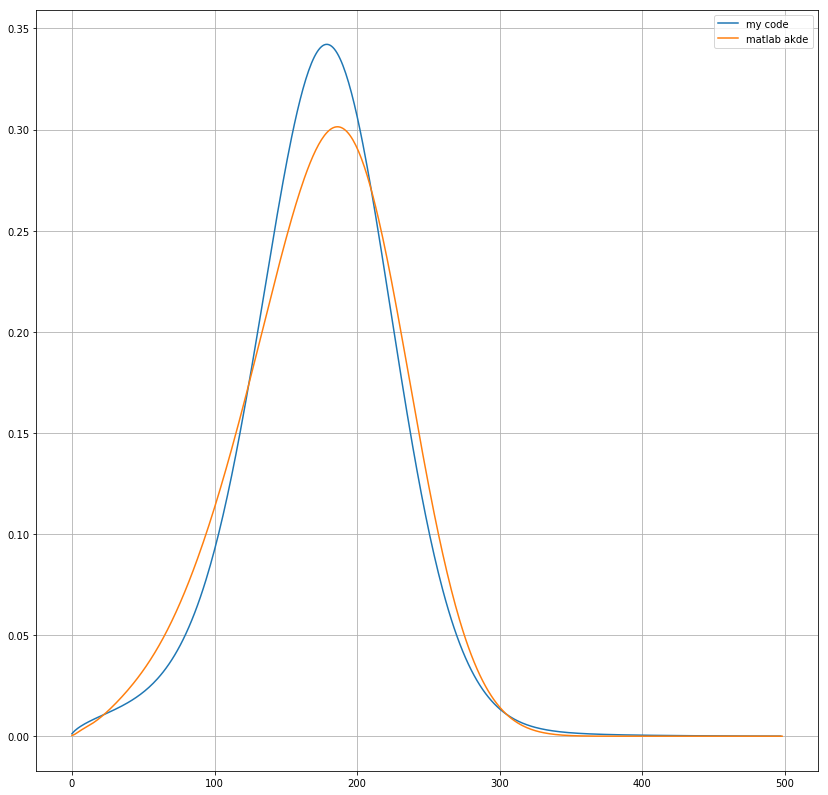

In [348]:
plt.figure(figsize=(14, 14))
plt.plot(data_appr)
plt.plot(dlog4[0])
print(len(data_appr), len(dlog4[0]))
plt.legend(["my code", "matlab akde"])
plt.grid()

In [342]:
dist_c = 28.
simpl = get_simplified(data, 0)
x_curr = (simpl[8192]['thin_ring_half_10'][dist_c][0][1:] + \
                simpl[8192]['thin_ring_half_10'][dist_c][0][:-1]) / 2
y_curr = simpl[8192]["thin_ring_half_10"][dist_c][1]

In [346]:
pathtxt = "/home/alex/TP/hse_data/"
# write N data
with open(os.path.join(pathtxt, "Natalia_bins.txt"), "w") as f:
    for k in range(len(x_curr)):
        f.write(str(x_curr[k]) + " " + str(y_curr[k]) + "\n")

xakde, yakde = np.exp(dlog4[1]).ravel()[:-1], np.exp(-dlog4[1].ravel())[:-1]*dlog4[0].ravel()[:-1]
with open(os.path.join(pathtxt, "akde_bins.txt"), "w") as f:
    for k in range(len(xakde)):
        f.write(str(xakde[k]) + " " + str(yakde[k]) + "\n")

In [ ]:
pathtxt = "/home/alex/TP/hse_data/"
# write N data
with open(os.path.join(pathtxt, "Natalia_bins.txt"), "w") as f:
    for k in range(len(x_curr)):
        f.write(str(x_curr[k]) + " " + str(y_curr[k]) + "\n")

xakde, yakde = np.exp(dlog4[1]).ravel()[:-1], np.exp(-dlog4[1].ravel())[:-1]*dlog4[0].ravel()[:-1]
with open(os.path.join(pathtxt, "akde_bins.txt"), "w") as f:
    for k in range(len(xakde)):
        f.write(str(xakde[k]) + " " + str(yakde[k]) + "\n")

In [345]:
xakde.shape, yakde.shape

((498,), (498,))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in true_divide


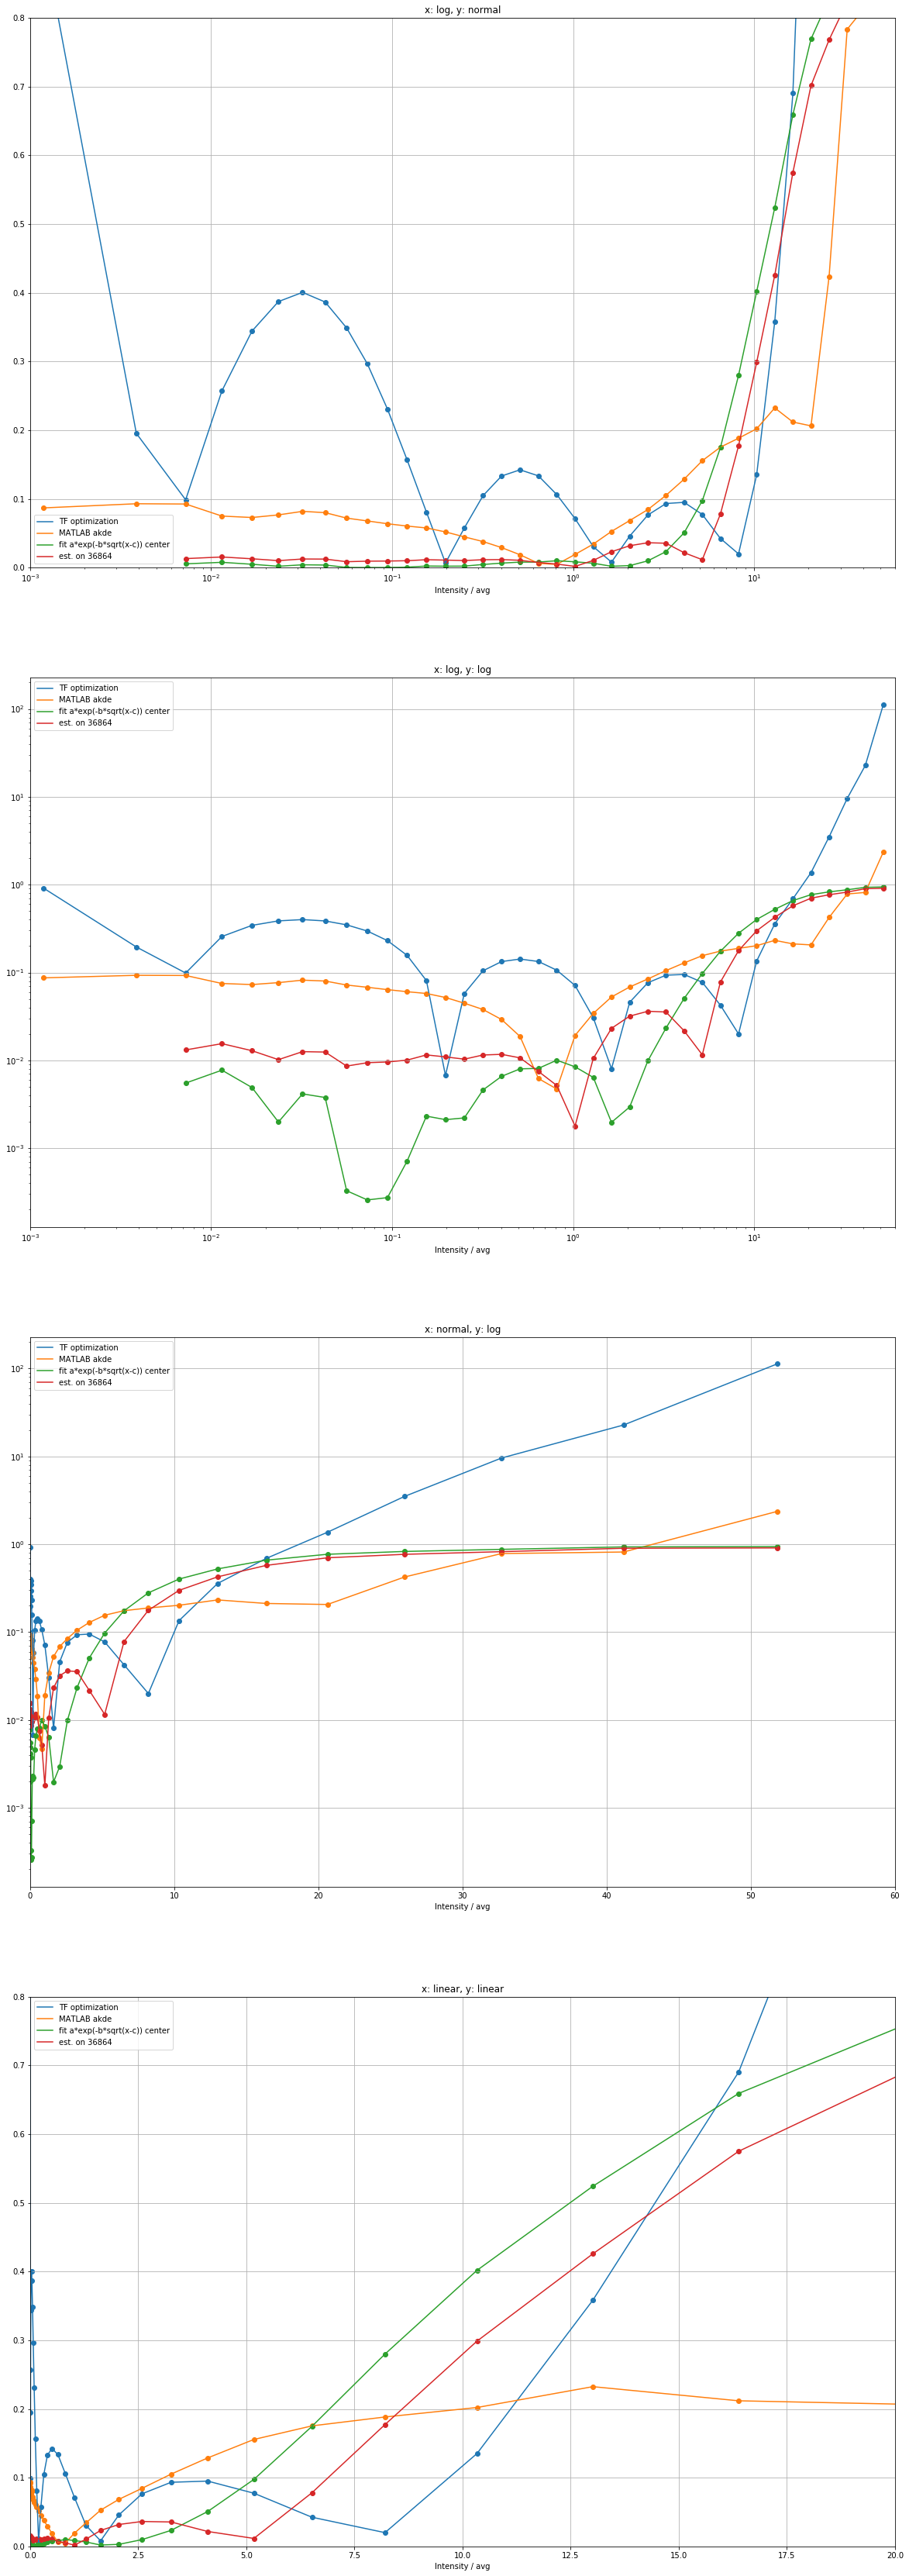

In [370]:
####################################################### custom painting
sbplts = [411, 412, 413, 414]
def plot_circ_data(data_a, cir_num):
    simpl = get_simplified(data_a, cir_num)
    kinds_resol = list(data_a.keys())
    kinds_slices = list(data_a[kinds_resol[0]].keys())

    dist_c = 28.0
    dist_str = ["28", "0"]

    if dist_c == 3.5:
        set_leg = ["MATLAB1 function", "MATLAB2", "MATLAB3", "rewritten code in python 1", "2", \
                  "8192 size, thin"]
    else:
        set_leg = ["TF optimization", "MATLAB akde", "fit a*exp(-b*sqrt(x-c)) center", "est. on 36864"]

    # interp function
    #plt.plot(d7[1], d7[0])
    #data_appr
    interp_fun0 = interp1d(np.exp(dlog4[1]).ravel()[:-1], np.exp(-dlog4[1].ravel())[:-1]*data_appr, \
                          kind="cubic")
    interp_fun1 = interp1d(np.exp(dlog4[1]).ravel()[:-1], np.exp(-dlog4[1].ravel())[:-1]*dlog4[0].ravel()[:-1], \
                          kind="cubic")
    interp_funabc0 = interp1d(x_abc0, y_abc0, kind="cubic")
    interp_funabc1 = interp1d(x_abc1, y_abc1, kind="cubic")
    
                          #*dlog4[0], kind="cubic")
    #print(np.exp(dlog2[1]).ravel())
    
    plt.figure(figsize=(20, 60))
    for s0,sbpl in enumerate(sbplts):
        plt.subplot(sbplts[s0])
        if s0 == 0:
            plt.xscale("log")
            plt.title("x: log, y: normal")
        elif s0 == 1:
            plt.xscale("log")
            plt.yscale("log")
            plt.title("x: log, y: log")
        elif s0 == 2:
            plt.yscale("log")
            plt.title("x: normal, y: log")
        else:
            plt.title("x: normal, y: normal")
        
        #plt.plot(np.exp(dlog2[1]).ravel(), np.exp(-dlog2[1].ravel())*dlog2[0])

        x_curr = (simpl[8192]['thin_ring_half_10'][dist_c][0][1:] + \
                        simpl[8192]['thin_ring_half_10'][dist_c][0][:-1]) / 2
        y_curr0 = np.abs(simpl[8192]["thin_ring_half_10"][dist_c][1][:-1]-interp_fun0(x_curr[:-1])) / \
                    simpl[8192]["thin_ring_half_10"][dist_c][1][:-1]
        y_curr1 = np.abs(simpl[8192]["thin_ring_half_10"][dist_c][1][:-1]-interp_fun1(x_curr[:-1])) / \
                    simpl[8192]["thin_ring_half_10"][dist_c][1][:-1]
        
        ind_start = np.min([k0 for k0,k in enumerate(x_curr) if k >= np.max([x_abc1[0], x_abc0[0]])])
        ind_end = np.max([k0 for k0,k in enumerate(x_curr) if k <= np.min([x_abc1[-1], x_abc0[-1]])]) + 1
        y_currabc0 = np.abs(simpl[8192]["thin_ring_half_10"][dist_c][1][\
                                    ind_start:ind_end]-interp_funabc0(x_curr[ind_start:ind_end])) / \
                    simpl[8192]["thin_ring_half_10"][dist_c][1][ind_start:ind_end]
        y_currabc1 = np.abs(simpl[8192]["thin_ring_half_10"][dist_c][1][\
                                    ind_start:ind_end]-interp_funabc1(x_curr[ind_start:ind_end])) / \
                    simpl[8192]["thin_ring_half_10"][dist_c][1][ind_start:ind_end]

        #print(x_curr.shape, y_curr.shape)
        plt.plot(x_curr[:-1], y_curr0)
        plt.scatter(x_curr[:-1], y_curr0)
        plt.plot(x_curr[:-1], y_curr1)
        plt.scatter(x_curr[:-1], y_curr1)
        plt.plot(x_curr[ind_start:ind_end], y_currabc0)
        plt.scatter(x_curr[ind_start:ind_end], y_currabc0)
        plt.plot(x_curr[ind_start:ind_end], y_currabc1)
        plt.scatter(x_curr[ind_start:ind_end], y_currabc1)
        
        #plt.scatter(np.sort(np.exp(mu_.ravel() * scaling + MIN)), 0.1 * np.ones((len(mu_),)))
        #plt.scatter(np.sort(np.exp(mu_.ravel() * scaling + MIN)), [np.abs(n[1]-n[0])/n[1] for n in showing])
        #sig_mod = Sig.ravel()[np.argsort(np.exp(mu_.ravel() * scaling + MIN))]
        #plt.scatter(x_curr[:-1], y_curr, marker="x", s=sig_mod, alpha=0.03)
        
        #plt.scatter(x_curr, \
        #        np.abs(simpl[8192]["thin_ring_half_10"][dist_c][1][:-1]-interp_fun(x_curr[:-1])) / \
        #            simpl[8192]["thin_ring_half_10"][dist_c][1][:-1], marker="x")
        """
        scatter_vals = interp_fun(np.sort(np.exp(mu_.ravel() * scaling + MIN)))
        plt.scatter(np.sort(np.exp(mu_.ravel() * scaling + MIN)), scatter_vals, c="r")
        """
        #sig_mod = np.log(Sig.ravel())-np.min(np.log(Sig.ravel()))
        #sig_mod = 10**Sig.ravel()
        #plt.scatter(np.sort(np.exp(mu_.ravel() * scaling + MIN)), scatter_vals, c="b", \
        #            s=sig_mod, alpha=0.03)
        #print(10*sig_mod[np.argsort(np.exp(mu_.ravel() * scaling + MIN))])
        
        plt.legend(set_leg)
        plt.xlabel("Intensity / avg")
        if dist_c == 28.0 and s0 == 2:
            plt.xlim(1e-3, 60)
        elif dist_c == 28.0 and s0 == 3:
            plt.xlim(0., 20.)
        else:
            plt.xlim(1e-3, 60)
        
        if s0 == 0 or s0 == 3:
            plt.ylim(0., 0.8)
        #if (s0 == 1 or s0 == 2):
        #    plt.ylim(1e-5, 2.)

        plt.grid()
        #plt.xlim(0, 30.)
        plt.legend(set_leg)
    #plt.grid()
    #plt.xlim(0, 0.2)
    plt.xlabel("Intensity / avg")
    plt.title("x: linear, y: linear")
    #plt.title("y: log")
    plt.savefig("kernel_est_"+dist_str[0]+"p_"+dist_str[1]+"km.pdf")
    plt.show()

plot_circ_data(data, 0)

In [42]:
np.log(x_curr)

array([-6.57917593, -5.39777834, -4.77043723, -4.30881423, -3.9266346 ,
       -3.59025562, -3.28305832, -2.99564208, -2.72220063, -2.45892193,
       -2.20319004, -1.95314976, -1.70745219, -1.46509758, -1.22533396,
       -0.98758909, -0.75142359, -0.51649769, -0.28254716, -0.04936562,
        0.1832087 ,  0.41530296,  0.64701729,  0.87843074,  1.10960574,
        1.34059169,  1.57142769,  1.80214471,  2.03276733,  2.26331501,
        2.49380319,  2.72424414,  2.95464758,  3.18502125,  3.41537126,
        3.64570248,  3.87601879,  4.10632325,  4.3366183 ,  4.56690587,
        4.79718751,  5.02746443,  5.2577376 ,  5.4880078 ,  5.71827564,
        5.94854159,  6.17880606,  6.40906935,  6.63933169, 17.79789722])

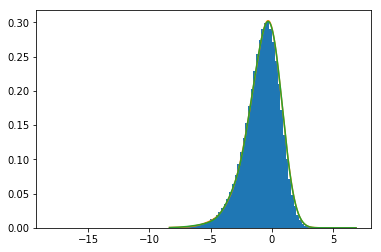

In [87]:
datnpy = np.load("/home/alex/TP/hse_data/data_28.0_0.npy")
plt.hist(np.log(datnpy/np.mean(datnpy)), bins=100, density=True)
plt.plot(dlog[1], dlog[0])
plt.plot(dlog1[1], dlog1[0])
plt.show()

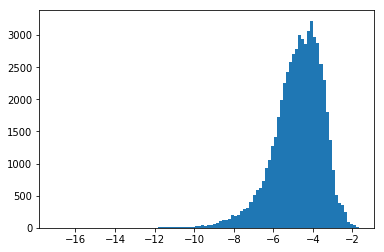

In [26]:
datnpy = np.load("/home/alex/TP/hse_data/data_3.5_0.npy")
plt.hist(np.log(datnpy), bins=100)
plt.show()

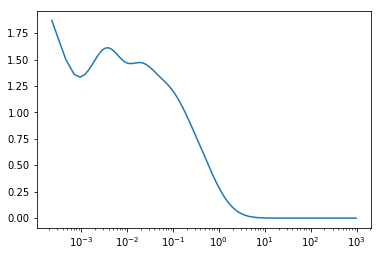

In [90]:
plt.plot(np.exp(dlog[1]), np.exp(-dlog[1].ravel())*dlog[0])
plt.xscale("log")

In [232]:
dlog4 = dlog4[3:]

In [228]:
with open("/home/alex/TP/hse_data/experiment_8192_28.0_log4_0.pkl", "rb") as f2:
    dlog4 = pkl.load(f2)
len(dlog4)

5

In [230]:
mu_, Sig, del_, pdf, grid = dlog4

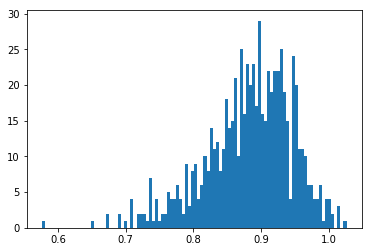

In [225]:
plt.hist(mu_, bins=100)
plt.show()

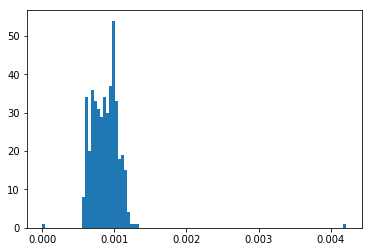

In [128]:
plt.hist(Sig, bins=100)
plt.show()

In [136]:
#transforming
d_here = np.log(\
        np.load("/home/alex/TP/hse_data/data_28.0_0.npy") / Iavg)
MAX, MIN = np.max(d_here, 0), np.min(d_here, 0)
scaling = MAX - MIN
MAX = MAX + scaling / 10.
MIN = MIN - scaling / 10.

d_here = (d_here - MIN) / scaling
#mu_ = mu_ * scaling + MIN

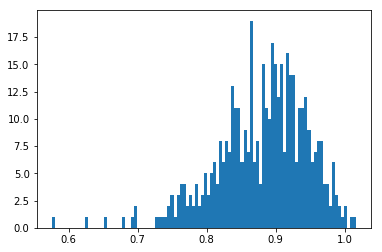

In [137]:
plt.hist(mu_, bins=100)
plt.show()

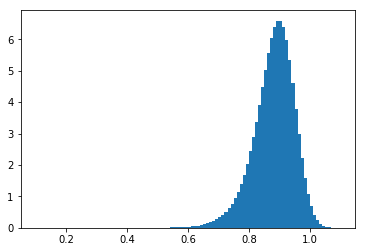

In [174]:
plt.hist(d_here.ravel(), bins=100, density=True)
plt.show()

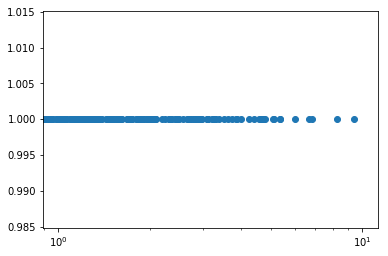

In [148]:
#plt.hist(np.exp(mu_.ravel() * scaling + MIN), bins=100)
plt.scatter(np.exp(mu_.ravel() * scaling + MIN), np.ones((len(mu_),)))
plt.xscale("log")
plt.show()

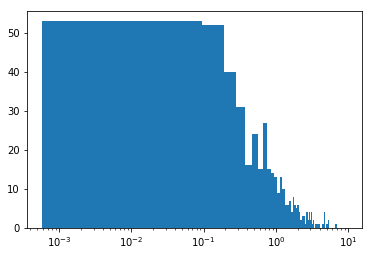

In [149]:
plt.hist(np.exp(mu_.ravel() * scaling + MIN), bins=100)
plt.xscale("log")
plt.show()

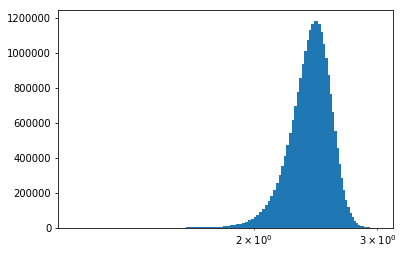

In [144]:
plt.hist(np.exp(d_here.ravel()), bins=100)
plt.xscale("log")
plt.show()

In [163]:
Sig.ravel()[np.argsort(np.exp(mu_.ravel() * scaling + MIN))]

array([4.21462834e-03, 8.93725913e-04, 6.99403660e-04, 1.29983922e-03,
       1.25370364e-03, 8.82591769e-04, 1.32728213e-03, 1.07833717e-03,
       1.12506217e-03, 8.20471922e-04, 8.74390771e-04, 1.17129700e-03,
       1.05284834e-03, 8.34001898e-04, 1.14118240e-03, 7.09655823e-04,
       7.44206481e-04, 1.10726744e-03, 1.02755460e-03, 9.95860345e-04,
       6.80871304e-04, 7.37789711e-04, 7.95915834e-04, 1.17352956e-03,
       7.57829764e-04, 1.17597964e-03, 7.14700043e-04, 6.15005144e-04,
       1.11929704e-03, 1.18077315e-03, 1.01615810e-03, 1.11731380e-03,
       7.86839756e-04, 1.03140295e-03, 7.73153516e-04, 6.70746153e-04,
       7.37318581e-04, 1.00250689e-03, 9.58775363e-04, 7.44427168e-04,
       6.76609522e-04, 1.07705134e-03, 1.04287643e-03, 6.09003073e-04,
       6.30391461e-04, 6.40092506e-04, 7.48701972e-04, 1.05172307e-03,
       7.49348937e-04, 9.02202182e-04, 1.07855496e-03, 9.97814343e-04,
       1.06046453e-03, 9.69646460e-04, 9.23967335e-04, 9.53809266e-04,
      

In [204]:
#np.exp((mu_.ravel()+Sig.ravel()) * scaling + MIN).ravel()
showing = list(zip(np.exp((mu_.ravel()-Sig.ravel()) * scaling + MIN).ravel(), \
        np.exp(mu_.ravel() * scaling + MIN).ravel(), \
    np.exp((mu_.ravel()+Sig.ravel()) * scaling + MIN).ravel()))
showing = [showing[k] for k in np.argsort(np.exp(mu_.ravel() * scaling + MIN)).ravel()]

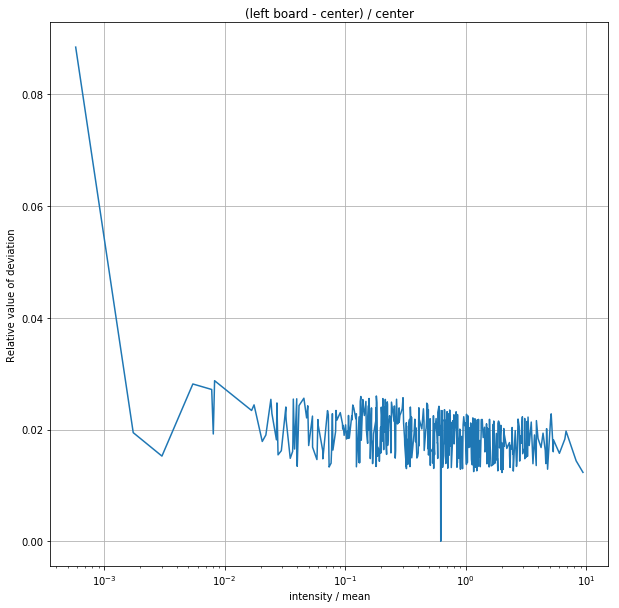

In [219]:
plt.figure(figsize=(10,10))
plt.title("(left board - center) / center")
plt.plot(np.sort(np.exp(mu_.ravel() * scaling + MIN).ravel()), [np.abs(n[1]-n[0])/n[1] for n in showing])
plt.ylabel("Relative value of deviation")
plt.xlabel("intensity / mean")
plt.xscale("log")
plt.grid()

In [336]:
dist_c = 28.0
simpl = get_simplified(data, 0)

x_curr = (simpl[8192]['thin_ring_half_10'][dist_c][0][1:] + \
                        simpl[8192]['thin_ring_half_10'][dist_c][0][:-1]) / 2.
with open("/home/alex/TP/hse_data/hist_28_xy.pkl", "wb") as f:
    pkl.dump({"x": x_curr, "y": simpl[8192]["thin_ring_half_10"][dist_c][1]}, f)

In [289]:
dist_c = 3.5
simpl = get_simplified(data, 0)

x_curr = np.sqrt(simpl[8192]['thin_ring_half_10'][dist_c][0][1:] * \
                        simpl[8192]['thin_ring_half_10'][dist_c][0][:-1])
with open("/home/alex/TP/hse_data/hist_3p5_xy.pkl", "wb") as f:
    pkl.dump({"x": x_curr, "y": simpl[8192]["thin_ring_half_10"][dist_c][1]}, f)

In [356]:
# bins
dist_c = 28.0
simpl = get_simplified(data, 0)
x_curr = simpl[8192]['thin_ring_half_10'][dist_c][0]
          
with open("/home/alex/TP/hse_data/bins.pkl", "wb") as f:
    pkl.dump([x_curr[:-1], Iavg], f)

In [354]:
Iavg, x_curr

(array(4.21129645e-05),
 array([0.00000000e+00, 2.37148471e-03, 5.35700768e-03, 9.11555916e-03,
        1.38472961e-02, 1.98042011e-02, 2.73035017e-02, 3.67445638e-02,
        4.86301590e-02, 6.35932399e-02, 8.24306465e-02, 1.06145541e-01,
        1.36000830e-01, 1.73586420e-01, 2.20903884e-01, 2.80473054e-01,
        3.55466210e-01, 4.49877019e-01, 5.68733209e-01, 7.18364318e-01,
        9.06738760e-01, 1.14388818e+00, 1.44244167e+00, 1.81829832e+00,
        2.29147391e+00, 2.88716679e+00, 3.63709985e+00, 4.58120983e+00,
        5.76977411e+00, 7.26608819e+00, 9.14983638e+00, 1.15213353e+01,
        1.45068762e+01, 1.82654502e+01, 2.29972155e+01, 2.89541563e+01,
        3.64535019e+01, 4.58946206e+01, 5.77802872e+01, 7.27434579e+01,
        9.15809774e+01, 1.15296014e+02, 1.45151483e+02, 1.82737298e+02,
        2.30055046e+02, 2.89624573e+02, 3.64618179e+02, 4.59029555e+02,
        5.77886458e+02, 7.27518464e+02, 9.15894037e+07]))

In [18]:
dist_c = 28
simpl = get_simplified(data, 1)


x_8192 = (simpl[8192]['thin_ring_half_10'][dist_c][0][1:] + \
                simpl[8192]['thin_ring_half_10'][dist_c][0][:-1]) / 2
y_8192 = simpl[8192]["thin_ring_half_10"][dist_c][1]
x_36864 = (simpl[36864]['thin_ring_half_10'][dist_c][0][1:] + \
                simpl[36864]['thin_ring_half_10'][dist_c][0][:-1]) / 2
y_36864 = simpl[36864]["thin_ring_half_10"][dist_c][1]

36864 thick_ring_half_5


In [ ]:
plt.plot(np.exp(dlog[1]), np.exp(-dlog[1].ravel())*dlog[0])

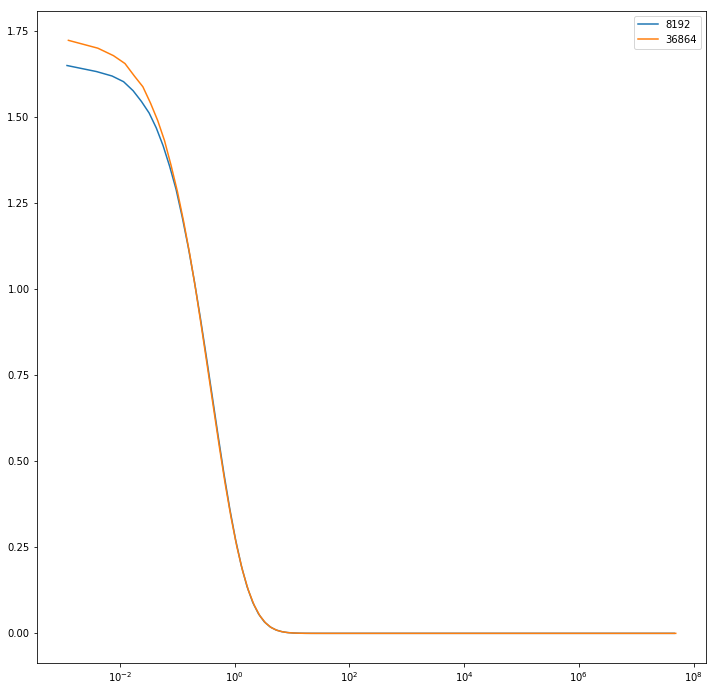

In [19]:
plt.figure(figsize=(12,12))
#plt.plot(np.exp(x_8192), np.exp(-x_8192)*y_8192)
#plt.plot(np.exp(x_36864), np.exp(-x_36864)*y_36864)
plt.plot(x_8192, y_8192)
plt.plot(x_36864, y_36864)
plt.xscale("log")
plt.legend(["8192", "36864"])
plt.show()

36864 thick_ring_half_5


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in true_divide


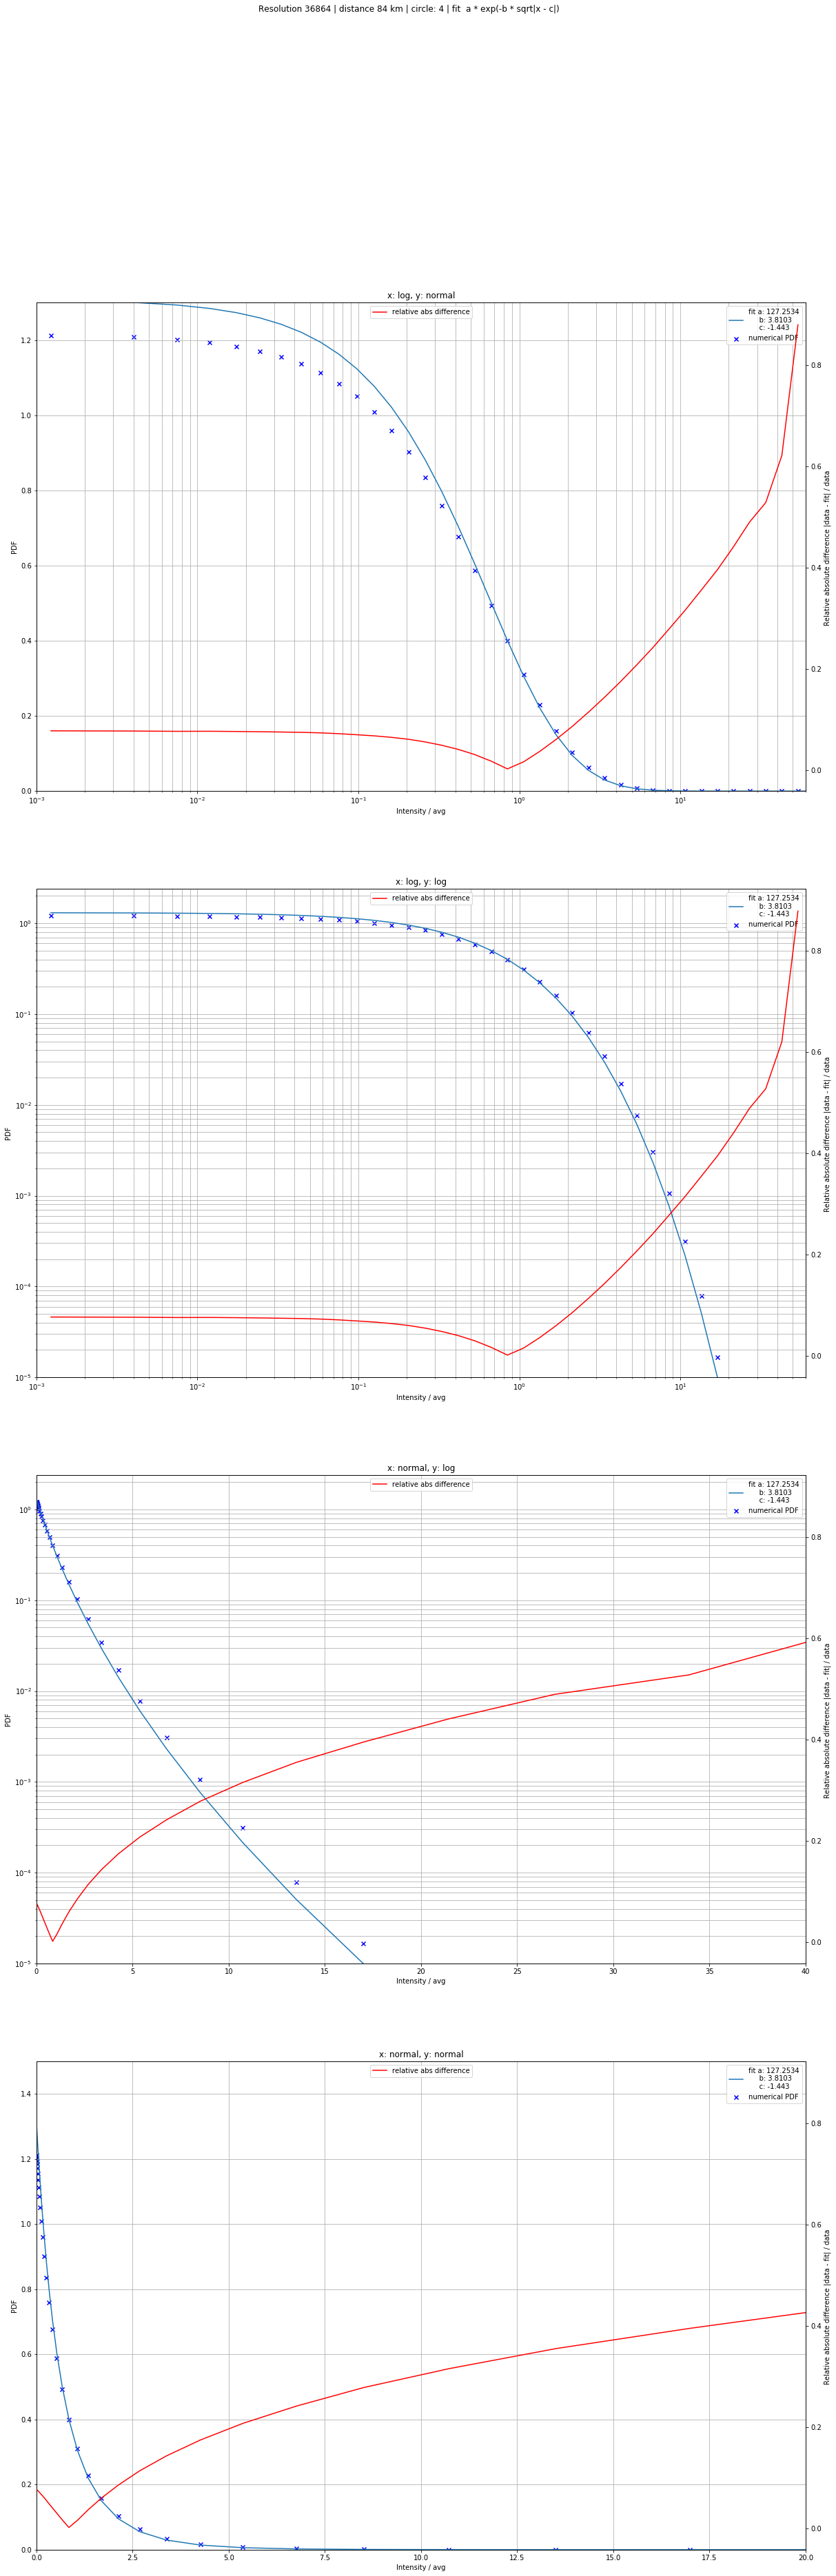

In [98]:
####################################################### custom painting
sbplts = [411, 412, 413, 414]
with open("/home/alex/TP/hse_data/coeffs.pkl", "rb") as f:
    ans_dict = pkl.load(f)

def plot_circ_data(data_a, cir_num):
    simpl = get_simplified(data_a, cir_num)
    kinds_resol = list(data_a.keys())
    kinds_slices = list(data_a[kinds_resol[0]].keys())

    resol = 36864
    dist_c = 84
    cir_n = cir_num
    dist_str = ["84", "0"]

    #set_leg = ["numerical PDF", "fit a*exp(-b*sqrt(x-c)) coeffs"]

    # interp function
    
    fig, ax = plt.subplots(4, 1, figsize=(20, 60))
    #ax1 = ax.twinx() 
    plt.suptitle("Resolution " + str(resol) + " | distance " + str(dist_c) + " km | " + \
                 "circle: " + str(cir_n) + " | fit  a * exp(-b * sqrt|x - c|)")
    for s0,sbpl in enumerate(sbplts):
        #plt.subplot(sbplts[s0])
        if s0 == 0:
            ax[s0].set_xscale("log")
            ax[s0].set_title("x: log, y: normal")
        elif s0 == 1:
            ax[s0].set_xscale("log")
            ax[s0].set_yscale("log")
            ax[s0].set_title("x: log, y: log")
        elif s0 == 2:
            ax[s0].set_yscale("log")
            ax[s0].set_title("x: normal, y: log")
        else:
            ax[s0].set_title("x: normal, y: normal")

        ax1 = ax[s0].twinx()

        x_curr = (simpl[resol]['thin_ring_half_10'][dist_c][0][1:] + \
                        simpl[resol]['thin_ring_half_10'][dist_c][0][:-1]) / 2
        y_curr0 = simpl[resol]["thin_ring_half_10"][dist_c][1]
        
        ax[s0].plot(x_curr, y_curr0, c="w", alpha=0.1)
        ax[s0].scatter(x_curr, y_curr0, marker="x", c="b", label="numerical PDF")
        
        #a * tf.exp(-b * tf.sqrt(tf.compat.v1.nn.relu(x - c)))
        ax[s0].plot(x_curr, ans_dict[dist_c][cir_n][0] * np.exp(-ans_dict[dist_c][cir_n][1] * \
                                np.sqrt(np.maximum(0., x_curr - ans_dict[dist_c][cir_n][2]))), \
                label="fit " + "a: " + str(round(ans_dict[dist_c][cir_n][0], 4)) + "\n" + \
                               "     b: " + str(round(ans_dict[dist_c][cir_n][1], 4)) + "\n" + \
                               "     c: " + str(round(ans_dict[dist_c][cir_n][2], 4)))
        
        ax1.plot(x_curr, np.abs(y_curr0 - \
                        ans_dict[dist_c][cir_n][0] * np.exp(-ans_dict[dist_c][cir_n][1] * \
                                np.sqrt(np.maximum(0., x_curr - ans_dict[dist_c][cir_n][2])))) / y_curr0, c="r",\
                label="relative abs difference")
        ax1.legend(loc="upper center")
        #ax1.grid(axis='both', which='both')

        ax[s0].set_ylabel("PDF")
        ax1.set_ylabel("Relative absolute difference |data - fit| / data ")
        
        #plt.legend(set_leg)
        ax[s0].set_xlabel("Intensity / avg")
        
        
        if s0 == 2:
            ax[s0].set_xlim(1e-3, 40)
        elif s0 == 3:
            ax[s0].set_xlim(0., 20.)
        else:
            ax[s0].set_xlim(1e-3, 60)
        
        if s0 == 0:
            ax[s0].set_ylim(0., 1.3)
        if s0 == 3:
            ax[s0].set_ylim(0., 1.5)
        if (s0 == 1 or s0 == 2):
            ax[s0].set_ylim(1e-5, 2.4)
        
        ax[s0].grid(axis='both', which='both')
        ax[s0].legend()
    #plt.grid()
    #plt.xlim(0, 0.2)
    #ax[s0].set_xlabel("Intensity / avg")
    #ax[s0].set_title("x: linear, y: linear")
    #plt.title("y: log")
    fig.savefig("/home/alex/TP/saveFigures/" + "_".join([str(r) for r in [resol, dist_c, cir_n]]) \
                + ".pdf")
    plt.show()

plot_circ_data(data, 4)